## 개요

+ **목적** : D2C 온라인 구매 현황 및 가설검정


+ **I .현황확인**
  + [ ] 기간별 현황(주/일/요일/시간대)
  + [ ] 지역 현황
  + [ ] 체널 현황
  + [ ] 제품별 현황
 

+ **II.가설 및 확인**
  + [x] Q1 : 체널별로 차이가 나는 부분이 있는가? : 체널별 특성이 확인됨
  + [x] Q2 : EIS 3Level 기준, 판매추이
    + [x] Q2-1 : HRM에 특이사항은? : 스프, 카레 및 파스타소스 모두 COVID로 주문이 증가함
    + [x] Q2-2 : 셀랙스 특이사항은? : 음료 중심 증가
    + [x] Q2-3 : Flavor기준 특이사항은? : 바나나,초코 >> 딸기/커피/홍삼
    + [ ] ~~Q2-4 : 코로나 여파로 특정 제품군이 수혜를 보았는가? : 1) HRM(스프 및 파스타소스), 2)유아 제품~~
    + [ ] Q2-5 : 유아 제품의 현황은?
  + [ ] ~~Q3 : 코로나 확진 추이와 온라인 매출간의 관계가 있는가?(& 얼마나 늘었는가?)~~
  + [x] Q4 : 코로나 여파의 주요 외부 변수는? : 네이버 검색 키워드, 관련 뉴스기사 껀 수의 경우, 온라인 Trend만 동일함
  + [ ] ~~Q5 : 재구매가 높은 제품군은?~~
  + [ ] Q6 : 같이 구매하는 제품 그룹은? : 유아제품 & 페레로
  

In [1]:
import pandas as pd
import os
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

# Display all cell outputs
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'
import cufflinks
from plotly.offline import iplot
cufflinks.go_offline()

from os import listdir

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

path = 'C:/windows/Fonts/malgun.ttf'                           # 폰트:맑은고딕
font_name = fm.FontProperties(fname=path, size=24).get_name()  
plt.rc('font', family=font_name)                               # 한글폰트 설정(전역)

### data read & format transfer

In [2]:
# 상품정보
PRODUCT = pd.read_excel('./200313_ecommerce_product.xlsx','PRODUCT')

In [3]:
# 외부정보 : 코로나바이러스 
COVID = pd.read_excel('./200313_COVID-19.xlsx', 'Sheet1')

COVID["확진일자"] = pd.to_datetime(COVID['확진일자'],format='%Y-%m-%d')
# COVID['월'] = COVID['확진일자'].dt.weekday
COVID['주차'] = COVID['확진일자'].dt.weekofyear
COVID["확진일자"] = COVID.확진일자.astype(str)

In [4]:
# 외부정보 : 네이버 검색지수 
search = pd.read_excel('./naver_검색지수.xlsx', 'Sheet1')
search["날짜"] = search.날짜.astype(str)

In [7]:
# 일별 주문정보

# 파일명 가져오기
directory_name = "./data"
file_names = listdir(directory_name)
# file_names.remove('자료확보 기준.JPG')
# file_names[0].split('_')[0]

ORDER = pd.DataFrame()

# 전체 자료 불러오기 & 병합
for open_file in file_names:
    df_temp = pd.read_excel('./data/' + open_file,'Sheet1')
    ORDER = pd.concat([ORDER, df_temp], ignore_index=False)

ORDER['주문일시'] = pd.to_datetime(ORDER['주문일시'],format=None)
ORDER['주문주차'] = ORDER['주문일시'].dt.weekofyear
ORDER['주문시간'] = ORDER['주문일시'].dt.strftime('%H')
ORDER['주문요일'] = ORDER['주문일시'].dt.dayofweek
ORDER['PROVINCE'] =  ORDER['주소'].str.split(' ').str[0]
ORDER['CITY'] =  ORDER['주소'].str.split(' ').str[1]
# ORDER["YYYYMM"] = ORDER.YYYYMM.astype(object).astype(str)

In [8]:
ORDER['PROVINCE'] = ORDER['PROVINCE'].str[:3]

ORDER['PROVINCE']= ORDER['PROVINCE'].replace('Seo',    '서울')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('강원도', '강원')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('경기도', '경기')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('Gye',    '경기')

ORDER['PROVINCE']= ORDER['PROVINCE'].replace('광주광', '광주')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('대전광', '대전')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('대구광', '대구')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('부산광', '부산')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('서울특', '서울')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('울산광', '울산')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('인천광', '인천')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('제주특', '제주')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('세종특', '세종')

ORDER['PROVINCE']= ORDER['PROVINCE'].replace('경상남', '경남')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('경상북', '경북')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('전라남', '전남')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('전라북', '전북')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('충청남', '충남')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('충청북', '충북')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('***',    '(자료없음)')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('nul',    '(자료없음)')
ORDER['PROVINCE']= ORDER['PROVINCE'].replace('(자료',  '(자료없음)')

In [9]:
# 필요한 항목만 선택
ORDER= ORDER[['거래처명', '주문일자', '주문일시', '주문번호(쇼핑몰)', '상품코드(쇼핑몰)', '상품명', '결제금액', '수량', 
              '우편번호', 'PROVINCE', '배송완료', '주문주차', '주문시간', '주문요일',]]

In [10]:
# 자료 합치기
ORDER = pd.merge(ORDER, PRODUCT, on ='상품명', how='left')

In [11]:
ORDER = ORDER[ORDER['주문주차'] != 3]
ORDER = ORDER[ORDER['주문주차'] != 13]

In [ ]:
# 제품정보 확인/다운로드

# item_all = ORDER.groupby(['거래처명', '상품명'])['주문일시'].count()

# writer = pd.ExcelWriter('item.xlsx')
# item_all.to_excel(writer, 'sheet1')
# writer.save()

In [ ]:
##########
# 키워드별 기사 수 확인
###

from datetime import datetime, timedelta
import requests
import re
from selenium import webdriver

text = '코로나바이러스'
cnt_news = []

numdays = (datetime.today()- datetime(2020, 1, 15)).days
date_news = [(datetime.today() - timedelta(days=x)).strftime('%Y.%m.%d') for x in range(1,numdays)]
date_news_s = [(datetime.today() - timedelta(days=x)).strftime('%Y-%m-%d') for x in range(1,numdays)]

# -*- coding=utf-8 -*-
options = webdriver.ChromeOptions()
options.add_argument('headless')
options.add_argument('disable-gpu')
driver = webdriver.Chrome('C:/Users/MAEIL/Downloads/chromedriver/chromedriver.exe', options=options)

# URL 설정
for dt_1 in date_news:
    search_url = 'https://search.naver.com/search.naver?where=news&query=' + str(text) + '&pd=3&ds=' + str(dt_1) + '&de=' + str(dt_1)
    
    # Web parsing
    driver.get(search_url)

    # 뉴스검색
    keyword_count = driver.find_element_by_xpath('//*[@id="main_pack"]/div[2]/div[1]/div[1]').text
    keyword_count = re.findall('/ (.*?)건',keyword_count )
    try:
        cnt_news.append(keyword_count[0].replace(',', ''))
    except:
        cnt_news.append('')

driver.close()

news = pd.DataFrame()
news['DATE'] = date_news_s
news['CNT'] = cnt_news
news['CNT'] = news['CNT'].astype(int)

## II. 가설 및 확인

### Q1 : 체널별로 차이가 나는 부분이 있는가?(ex. 주문 시간대, 제품 Category 등)

In [12]:
ORDER_A = ORDER[(ORDER.거래처명 == '11번가')]
ORDER_B = ORDER[(ORDER.거래처명 == '스마트스토어')]
ORDER_C = ORDER[(ORDER.거래처명 == '쿠팡')]
ORDER_D = ORDER[(ORDER.거래처명 == '이마트(신)')]
ORDER_E = ORDER[(ORDER.거래처명 == '카카오톡스토어')]
ORDER_F = ORDER[(ORDER.거래처명 == '위메프(신)')]
ORDER_G = ORDER[(ORDER.거래처명 == '정원e샵(신)')]
ORDER_H = ORDER[(ORDER.거래처명 == 'Grip')]

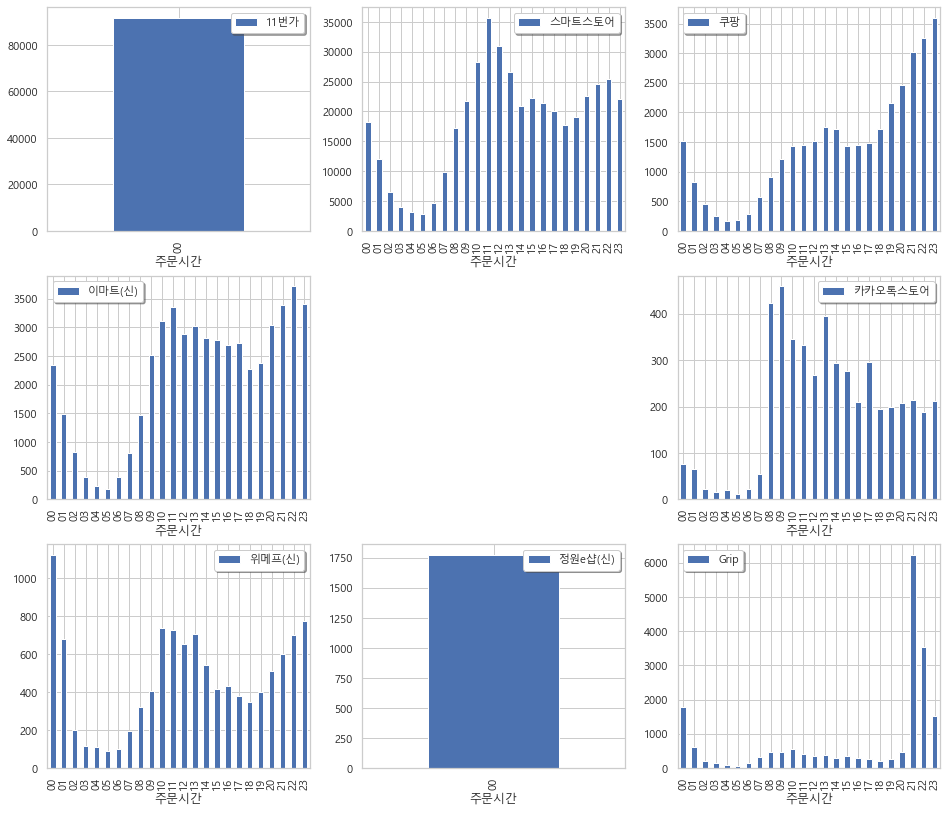

In [10]:
mpl.rc('figure', figsize=(16, 14))

ax = plt.subplot(3,3,1)
pd.crosstab(ORDER_A.주문시간, ORDER_A.거래처명, ORDER_A.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,2)
pd.crosstab(ORDER_B.주문시간, ORDER_B.거래처명, ORDER_B.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,3)
pd.crosstab(ORDER_C.주문시간, ORDER_C.거래처명, ORDER_C.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,4)
pd.crosstab(ORDER_D.주문시간, ORDER_D.거래처명, ORDER_D.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

# ax = plt.subplot(3,3,5)
# pd.crosstab(ORDER.주문시간, ORDER.거래처명, ORDER.수량, aggfunc="count").plot.bar(ax = ax)
# plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,6)
pd.crosstab(ORDER_E.주문시간, ORDER_E.거래처명, ORDER_E.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,7)
pd.crosstab(ORDER_F.주문시간, ORDER_F.거래처명, ORDER_F.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,8)
pd.crosstab(ORDER_G.주문시간, ORDER_G.거래처명, ORDER_G.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,9)
pd.crosstab(ORDER_H.주문시간, ORDER_H.거래처명, ORDER_H.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

plt.show()

**<주문 요일 관련 특이사항>**
+ 11번가, 정원e샵 :  주문 시간에 대한 정보는 수집되지 않음
+ 카카오톡스토어 : Push 발송 시점으로 추정되는 9시/13시/17시에 주문이 증가함
+ 쿠팡 : 저녁에 주문이 활발함
+ 그립 : 광고 방송시점으로 보이는 21시에 주문이 활발함
+ 그 외: 오전 11시 및 저녁 10시에 주문이 활발함

In [ ]:
ORDER.EIS2lv =='조제분유'

In [12]:
ORDER_C = ORDER[(ORDER.거래처명 == '스마트스토어')]
ORDER_C2 = ORDER[(ORDER.거래처명 == '스마트스토어') & (ORDER.EIS2lv =='조제분유')]

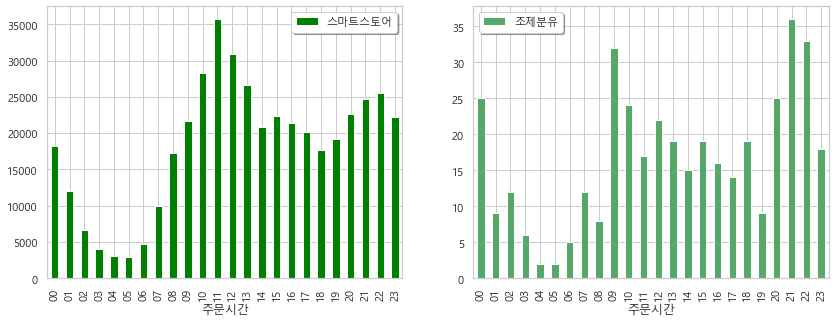

In [15]:
mpl.rc('figure', figsize=(14, 5))

ax = plt.subplot(1,2,1)
pd.crosstab(ORDER_C.주문시간, ORDER_C.거래처명, ORDER_C.수량, aggfunc="count").plot.bar(ax = ax, color ='green')
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(1,2,2)
pd.crosstab(ORDER_C2.주문시간, ORDER_C2.EIS2lv, ORDER_C2.수량, aggfunc="count").plot.bar(ax = ax, color ='g')
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

plt.show()

In [18]:
ORDER.EIS2lv.unique()

array(['유기농', '백색시유', '성인영양식', '두유', '가공유', '아몬드밀크', '조제분유', '주스', '프랄린',
       '임산부용', '커피', '유아식', '스프', '허쉬', '킨더', '가공치즈', '상하농원', '파스타소스',
       '곡물음료', '카레', '누텔라', nan, '엠디웰', '디저트'], dtype=object)

In [22]:
ORDER_C = ORDER[(ORDER.거래처명 == '스마트스토어')]
ORDER_C3 = ORDER[(ORDER.거래처명 == '스마트스토어') & (ORDER.EIS3lv =='스낵치즈')]

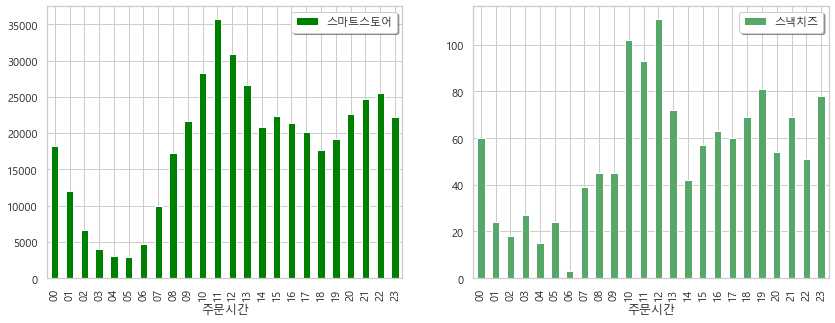

In [23]:
mpl.rc('figure', figsize=(14, 5))

ax = plt.subplot(1,2,1)
pd.crosstab(ORDER_C.주문시간, ORDER_C.거래처명, ORDER_C.수량, aggfunc="count").plot.bar(ax = ax, color ='green')
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(1,2,2)
pd.crosstab(ORDER_C3.주문시간, ORDER_C3.EIS3lv, ORDER_C3.수량, aggfunc="count").plot.bar(ax = ax, color ='g')
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

plt.show()

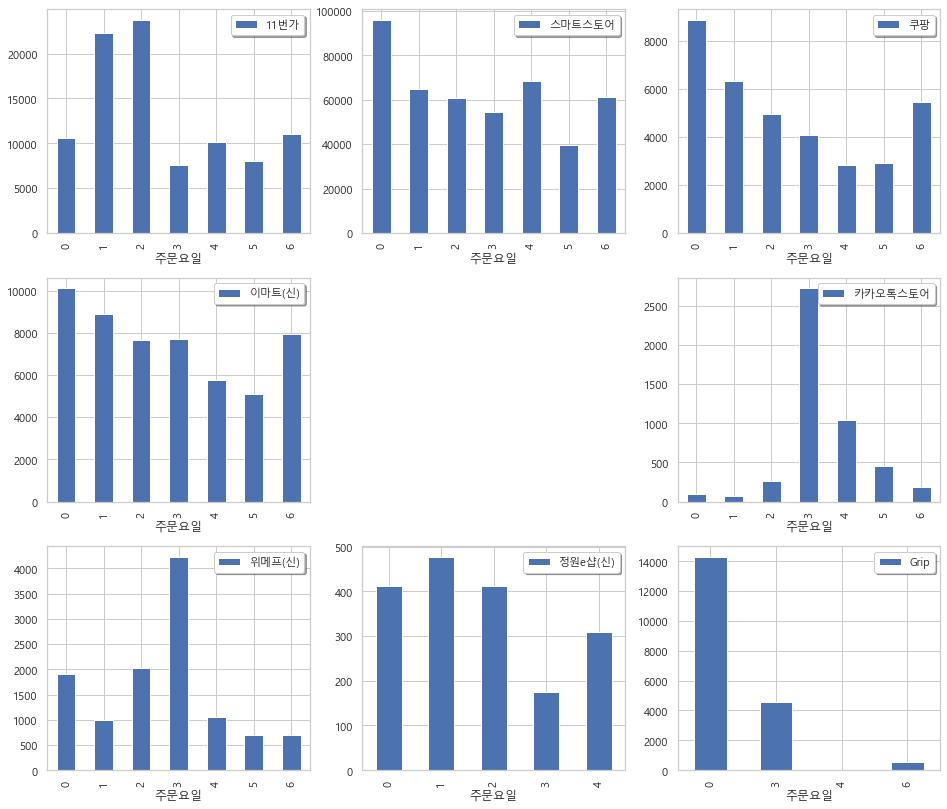

In [0]:
mpl.rc('figure', figsize=(16, 14))

ax = plt.subplot(3,3,1)
pd.crosstab(ORDER_A.주문요일, ORDER_A.거래처명, ORDER_A.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,2)
pd.crosstab(ORDER_B.주문요일, ORDER_B.거래처명, ORDER_B.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,3)
pd.crosstab(ORDER_C.주문요일, ORDER_C.거래처명, ORDER_C.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,4)
pd.crosstab(ORDER_D.주문요일, ORDER_D.거래처명, ORDER_D.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

# ax = plt.subplot(3,3,5)

ax = plt.subplot(3,3,6)
pd.crosstab(ORDER_E.주문요일, ORDER_E.거래처명, ORDER_E.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,7)
pd.crosstab(ORDER_F.주문요일, ORDER_F.거래처명, ORDER_F.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,8)
pd.crosstab(ORDER_G.주문요일, ORDER_G.거래처명, ORDER_G.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,9)
pd.crosstab(ORDER_H.주문요일, ORDER_H.거래처명, ORDER_H.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

plt.show()

**<주문 요일 관련 특이사항>**
- 월요일(0) 활발 : 쿠팡/그립
- 화요일(1) 활발 : 11번가
- 목요일(3) 활발 : 카카오/위메프
- 금요일(4) 활발 : 스마트스토어


- 수요일(2) 저조 : 공통(구매 휴식)
- 토요일(5) 저조 : 공통(구매 휴식)
- 일요일(6) 회복 : 공통(구매 고려)

In [0]:
# ORDER.groupby(['주소1']).count()['주문일자'].iplot(
#     kind='bar', yTitle='Count', linecolor='black', title='지역별 주문껀 수(동적 그래프)')

### 지역 현황

In [0]:
# pd.DataFrame(ORDER.groupby('거래처명').count()['주문일자']).reset_index()

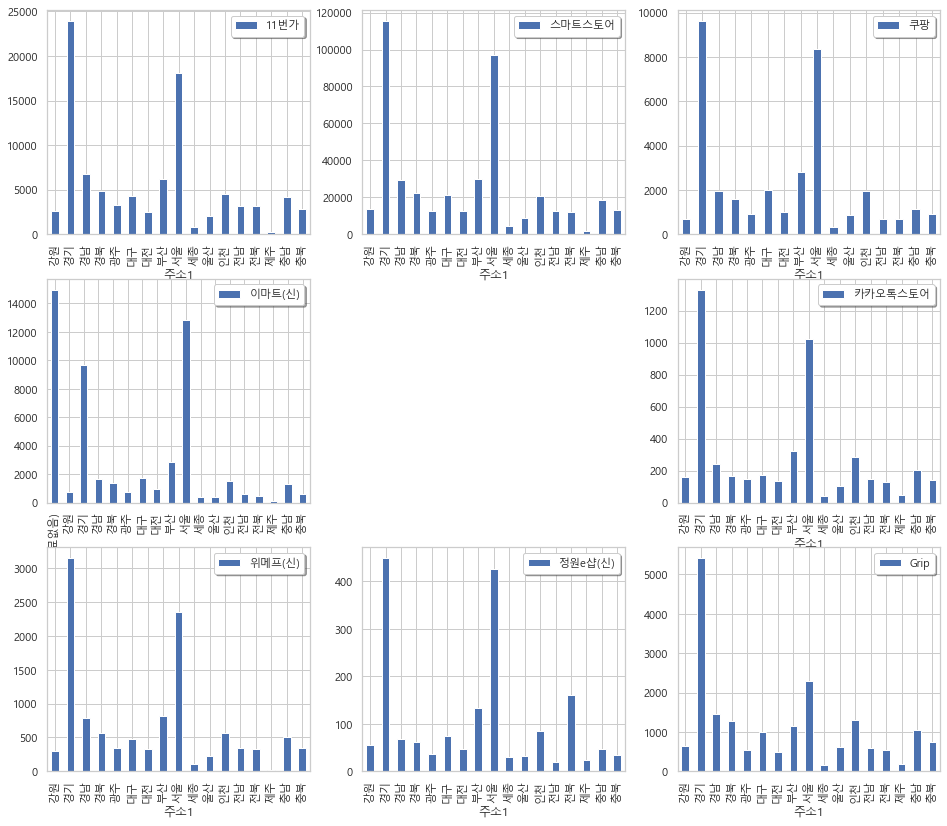

In [0]:
mpl.rc('figure', figsize=(16, 14))

ax = plt.subplot(3,3,1)
pd.crosstab(ORDER_A.주소1, ORDER_A.거래처명, ORDER_A.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,2)
pd.crosstab(ORDER_B.주소1, ORDER_B.거래처명, ORDER_B.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,3)
pd.crosstab(ORDER_C.주소1, ORDER_C.거래처명, ORDER_C.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,4)
pd.crosstab(ORDER_D.주소1, ORDER_D.거래처명, ORDER_D.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

# ax = plt.subplot(3,3,5)

ax = plt.subplot(3,3,6)
pd.crosstab(ORDER_E.주소1, ORDER_E.거래처명, ORDER_E.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,7)
pd.crosstab(ORDER_F.주소1, ORDER_F.거래처명, ORDER_F.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,8)
pd.crosstab(ORDER_G.주소1, ORDER_G.거래처명, ORDER_G.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,9)
pd.crosstab(ORDER_H.주소1, ORDER_H.거래처명, ORDER_H.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

plt.show()

**<특이사항>**
+ 쿠팡 : 제주 판매 정보가 누락됨
+ 그립 : 서울에서 약세를 보임

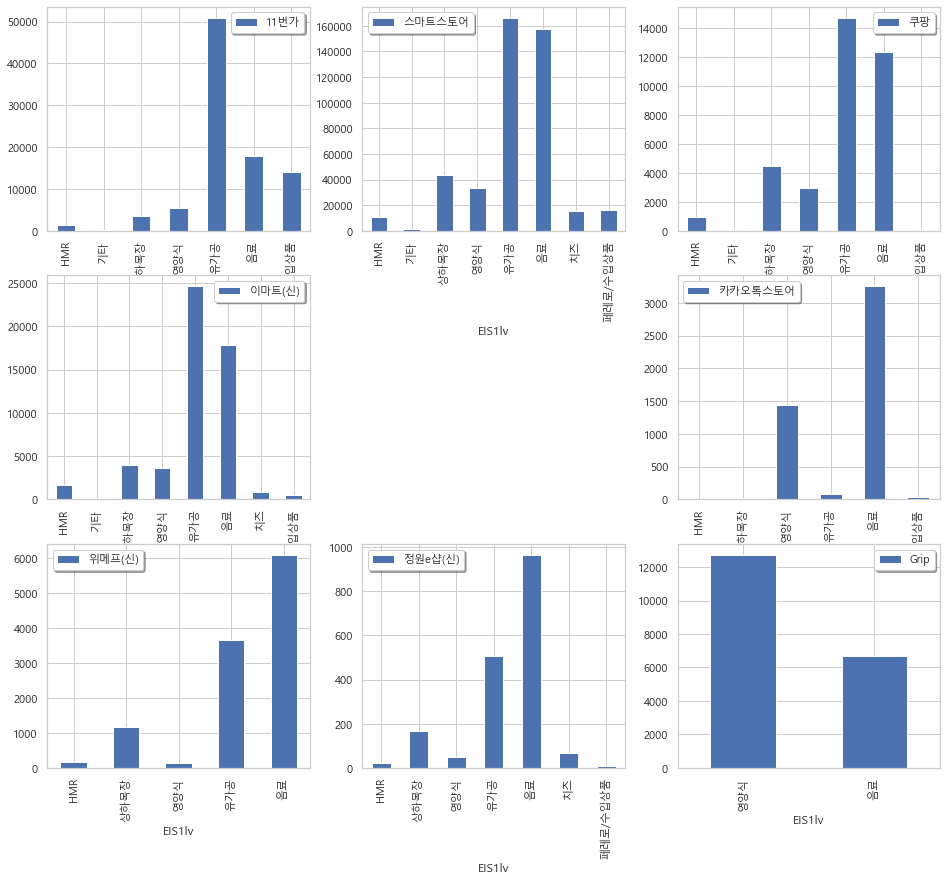

In [0]:
mpl.rc('figure', figsize=(16, 14))

ax = plt.subplot(3,3,1)
pd.crosstab(ORDER_A.EIS1lv, ORDER_A.거래처명, ORDER_A.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,2)
pd.crosstab(ORDER_B.EIS1lv, ORDER_B.거래처명, ORDER_B.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,3)
pd.crosstab(ORDER_C.EIS1lv, ORDER_C.거래처명, ORDER_C.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,4)
pd.crosstab(ORDER_D.EIS1lv, ORDER_D.거래처명, ORDER_D.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

# ax = plt.subplot(3,3,5)

ax = plt.subplot(3,3,6)
pd.crosstab(ORDER_E.EIS1lv, ORDER_E.거래처명, ORDER_E.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,7)
pd.crosstab(ORDER_F.EIS1lv, ORDER_F.거래처명, ORDER_F.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,8)
pd.crosstab(ORDER_G.EIS1lv, ORDER_G.거래처명, ORDER_G.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,9)
pd.crosstab(ORDER_H.EIS1lv, ORDER_H.거래처명, ORDER_H.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

plt.show()

<주문 제품(1lv) 특이사항>
- 전체널 모두, 음료 카테고리에 대한 구매 접근성이 좋음
- 쿠팡/스마트스토어에서는 상하목장 구매가 활발함
- 카카오에서는 영양식과 음료만 주로 거래됨

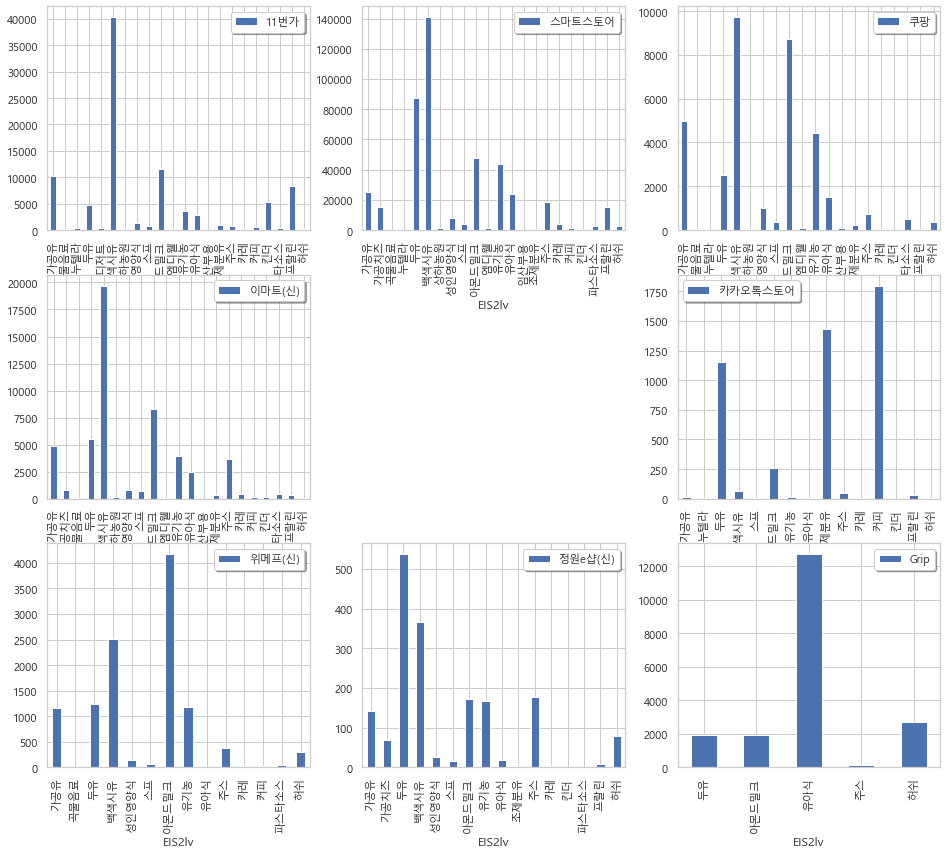

In [0]:
mpl.rc('figure', figsize=(16, 14))

ax = plt.subplot(3,3,1)
pd.crosstab(ORDER_A.EIS2lv, ORDER_A.거래처명, ORDER_A.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,2)
pd.crosstab(ORDER_B.EIS2lv, ORDER_B.거래처명, ORDER_B.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,3)
pd.crosstab(ORDER_C.EIS2lv, ORDER_C.거래처명, ORDER_C.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,4)
pd.crosstab(ORDER_D.EIS2lv, ORDER_D.거래처명, ORDER_D.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

# ax = plt.subplot(3,3,5)

ax = plt.subplot(3,3,6)
pd.crosstab(ORDER_E.EIS2lv, ORDER_E.거래처명, ORDER_E.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,7)
pd.crosstab(ORDER_F.EIS2lv, ORDER_F.거래처명, ORDER_F.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,8)
pd.crosstab(ORDER_G.EIS2lv, ORDER_G.거래처명, ORDER_G.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,9)
pd.crosstab(ORDER_H.EIS2lv, ORDER_H.거래처명, ORDER_H.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

plt.show()

<주문 제품(1lv) 특이사항>
- 음료의 구매접근이 좋은 이유는 두유가 포함되어있기 때문임
- 유기농 쿠팡체널에서 활성화 됨  
   $\to$ 채널 특성(배송속도)가 활성화 원인으로 추정됨

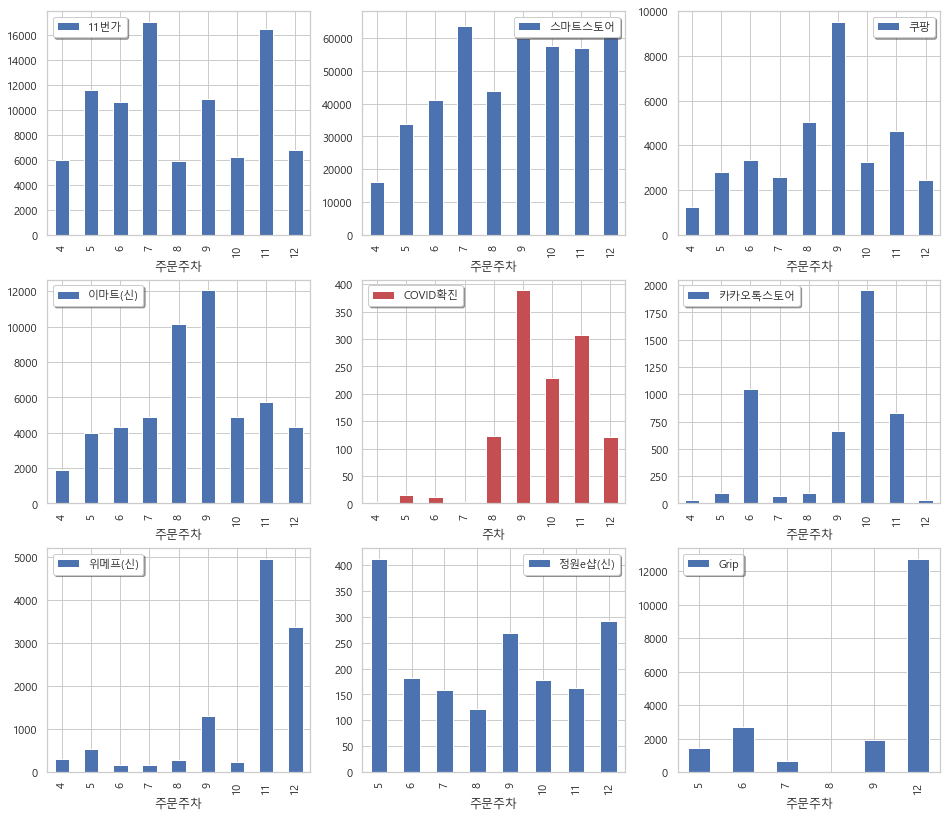

In [29]:
mpl.rc('figure', figsize=(16, 14))

ax = plt.subplot(3,3,1)
pd.crosstab(ORDER_A.주문주차, ORDER_A.거래처명, ORDER_A.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,2)
pd.crosstab(ORDER_B.주문주차, ORDER_B.거래처명, ORDER_B.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,3)
pd.crosstab(ORDER_C.주문주차, ORDER_C.거래처명, ORDER_C.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,4)
pd.crosstab(ORDER_D.주문주차, ORDER_D.거래처명, ORDER_D.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,5)
pd.crosstab(COVID.주차, 'COVID확진', COVID.지역1, aggfunc="count").plot.bar(ax = ax, color = 'r')
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,6)
pd.crosstab(ORDER_E.주문주차, ORDER_E.거래처명, ORDER_E.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,7)
pd.crosstab(ORDER_F.주문주차, ORDER_F.거래처명, ORDER_F.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,8)
pd.crosstab(ORDER_G.주문주차, ORDER_G.거래처명, ORDER_G.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(3,3,9)
pd.crosstab(ORDER_H.주문주차, ORDER_H.거래처명, ORDER_H.수량, aggfunc="count").plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

plt.show()

**<체널별 주(weekend)별 추이>**
- 네이버 : 가장 큰 체널이나, COVID와 유사 추이는 보이지 않음
- 쿠팡 : COVID 트랜드와 가장 동일한 추이를 보임 
- 위메프 : COVID 트랜드와 유사하며, 실제로는 11주차 이후부터 본격적으로 활성화 됨
- 11번가 : 11절데이가 포함된 시점이 있어, 별도 확인이 필요함(단, 전반적으로는 COVID와 유사함)
- 이마트 : COVID 이슈 첫 주(8~9주차)에는 주문껀수와 유사 추이를 보였으나, 이내 이전 상황으로 복귀함
- Grip : App 기반 홈쇼핑과 유사한 체널이므로, 광고방송이 진행된 12주차에 주문이 집중됨


### Q2 : EIS 3Level 기준, 판매추이

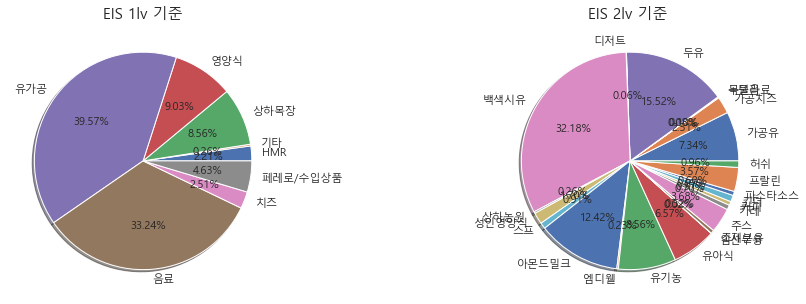

In [0]:
mpl.rc('figure', figsize=(16, 5))

# 전체비율
ax = plt.subplot(1,2,1)
plt.pie((pd.DataFrame(ORDER.groupby('EIS1lv').count()['주문일자']).reset_index())['주문일자'], 
        labels=(pd.DataFrame(ORDER.groupby('EIS1lv').count()['주문일자']).reset_index())['EIS1lv'], 
        autopct='%1.2f%%', # second decimal place
        shadow=True, 
        startangle=0,
        textprops={'fontsize': 11}) # text font size
plt.title('EIS 1lv 기준',fontsize=15)


ax = plt.subplot(1,2,2)
plt.pie((pd.DataFrame(ORDER.groupby('EIS2lv').count()['주문일자']).reset_index())['주문일자'], 
        labels=(pd.DataFrame(ORDER.groupby('EIS2lv').count()['주문일자']).reset_index())['EIS2lv'], 
        autopct='%1.2f%%', # second decimal place
        shadow=True, 
        startangle=0,
        textprops={'fontsize': 11}) # text font size
plt.title('EIS 2lv 기준 ',fontsize=15)

plt.show()

- EIS 2lv기준, 상위 Category에 대해서만 EIS 3lv 내용을 확인함 

In [0]:
print('EIS 2lv 겟수 : {}개'.format(len(ORDER.EIS2lv.unique())))
print('')
print('EIS 2lv 내용')
print(ORDER.EIS2lv.unique())

EIS 2lv 겟수 : 24개

EIS 2lv 내용
['백색시유' '유기농' '커피' '가공유' '두유' '카레' '성인영양식' '아몬드밀크' '조제분유' '주스' '유아식' '스프'
 '프랄린' '킨더' '임산부용' '누텔라' '허쉬' '파스타소스' '가공치즈' '상하농원' '곡물음료' nan '엠디웰' '디저트']


In [0]:

print('EIS 3lv 겟수 : {}개'.format(len(ORDER.EIS3lv.unique())))
print('')
print('EIS 3lv 내용')
print(ORDER.EIS3lv.unique())


EIS 3lv 겟수 : 59개

EIS 3lv 내용
['멸균' '가공유' '바리스타' '멸균가공' '매일두유' '카레' '음료' '소잘' '백색' '플레인' '칼슘' '명작' '바하'
 '과일야채' '썬업' '플레이버' '튼튼주스' '스프' '로쉐' '안심밥상' '본' '킨더 조이' '맘스앱솔루트' '안심아이차'
 '킨더 초콜릿' '유기농주스' '누텔라잼' '분말' '안심이유식' '센서티브' '허쉬드링크' '궁' '쌀떡뻥' '미니팝' '세트'
 '파스타소스' '스낵' '슬라이스 유아' '쌀과자' '계란' '햄' '처음과일' '산양' '스낵치즈' '유기농아기차'
 '슬라이스 정통' '잼' '헤미브' '피크닉' 'V-plan' '야채와과일' '발효유' '킨더 맥시' '누텔라앤고' '기타'
 '김치' nan '파우더' '캔']


In [0]:
ORDER.columns

Index(['거래처명', '주문일자', '주문일시', '주문번호(쇼핑몰)', '상품코드(쇼핑몰)', '상품명', '결제금액', '수량',
       '우편번호', 'PROVINCE', '배송완료', '주문주차', '주문시간', '주문요일', 'EIS1lv', 'EIS2lv',
       'EIS3lv', '맛', '취급체널', '음용연령'],
      dtype='object')

In [30]:
def EIS_lv3(category):
    mpl.rc('figure', figsize=(16, 4))

    ax = plt.subplot(1,2,1)
    pd.crosstab(ORDER[(ORDER.EIS2lv == category)].주문일자, 
                ORDER[(ORDER.EIS2lv == category)].EIS3lv, 
                ORDER[(ORDER.EIS2lv == category)].주문일시, 
                aggfunc="count").plot.line(stacked=False,  ax = ax)
    plt.legend(loc='best', fancybox=True, shadow=True)
    plt.xticks(rotation=90)
    plt.title(category + ' : 일(Day) 기준',fontsize=15)
    plt.xlabel('일(Day)')
    plt.ylabel('주문껀수')

    ax = plt.subplot(1,2,2)
    pd.crosstab(ORDER[(ORDER.EIS2lv == category)].주문주차, 
                ORDER[(ORDER.EIS2lv == category)].EIS3lv, 
                ORDER[(ORDER.EIS2lv == category)].주문일시, 
                aggfunc="count").plot.bar(stacked=False,  ax = ax)
    plt.legend(loc='best', fancybox=True, shadow=True)
    plt.xticks(rotation=90)
    plt.title(category + ' : 주(Weekend) 기준',fontsize=15)
    plt.xlabel('주(Weekend)')
    plt.ylabel('주문껀수')

    plt.show()

#### HMR

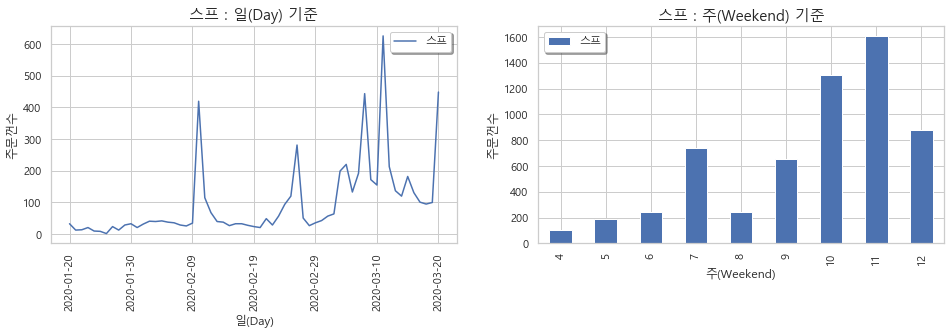

In [31]:
EIS_lv3('스프')

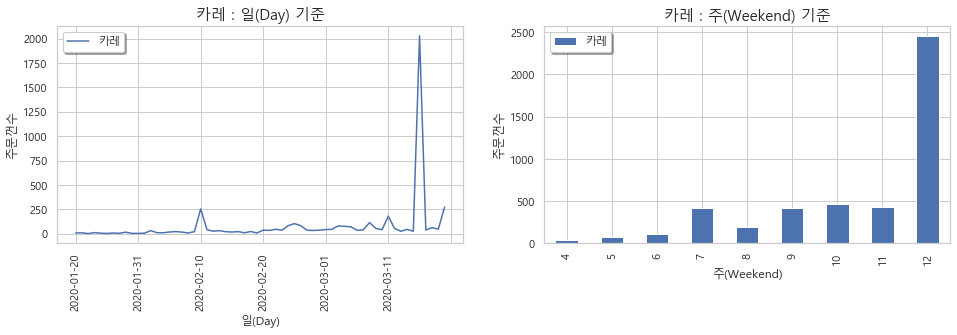

In [32]:
EIS_lv3('카레')

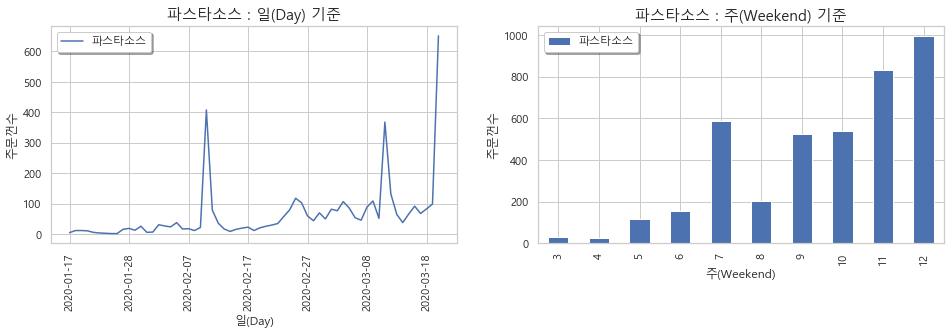

In [0]:
EIS_lv3('파스타소스')

#### 상하목장/상하농원

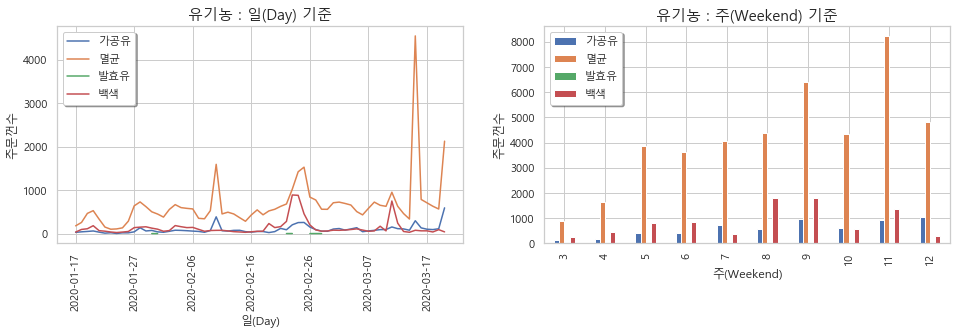

In [0]:
EIS_lv3('유기농')

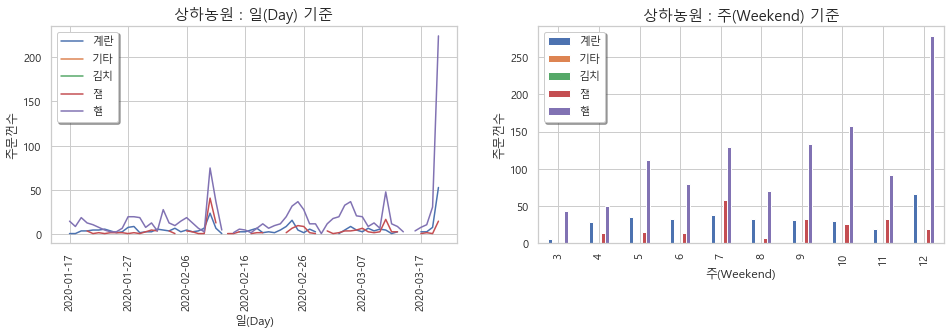

In [0]:
EIS_lv3('상하농원')

#### 영양식

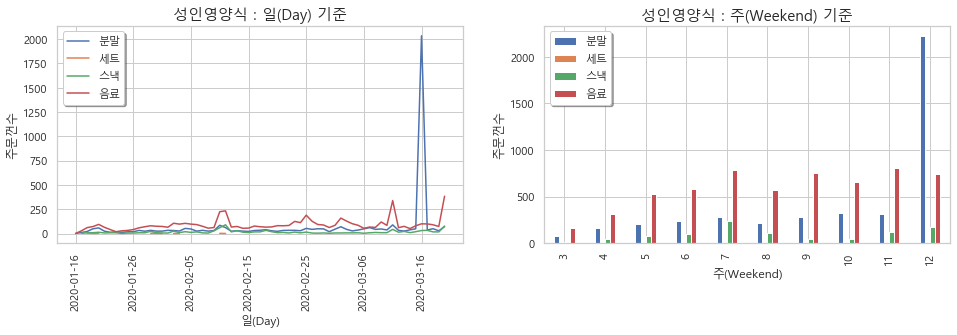

In [0]:
EIS_lv3('성인영양식')

+ Q2-2 : 셀랙스 추이에서 별도 언급 예정임

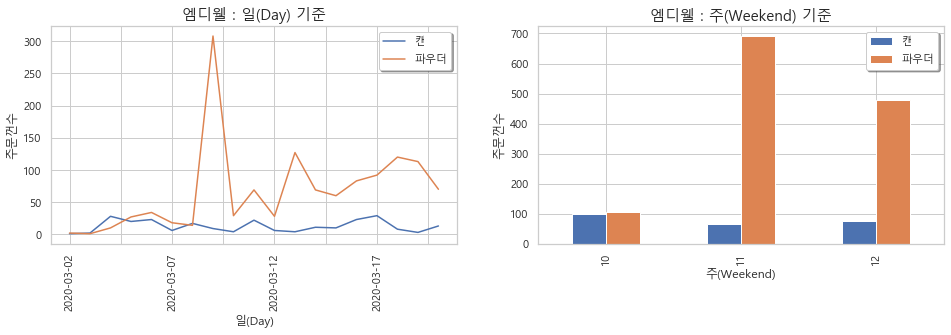

In [0]:
EIS_lv3('엠디웰')

+ 3월부터 온라인 판매가 진행되면서, COVID 이슈와는 무관함

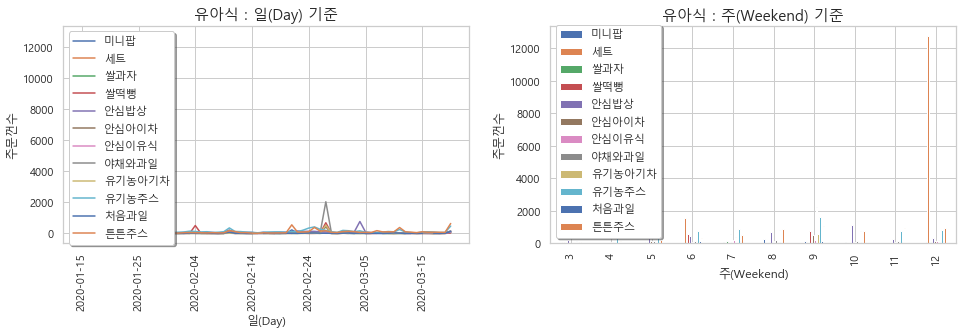

In [0]:
EIS_lv3('유아식')

+ [유아식]의 EIS 3lv에 대해서는 별도기준 고려(ex. 음료/식품/그외)

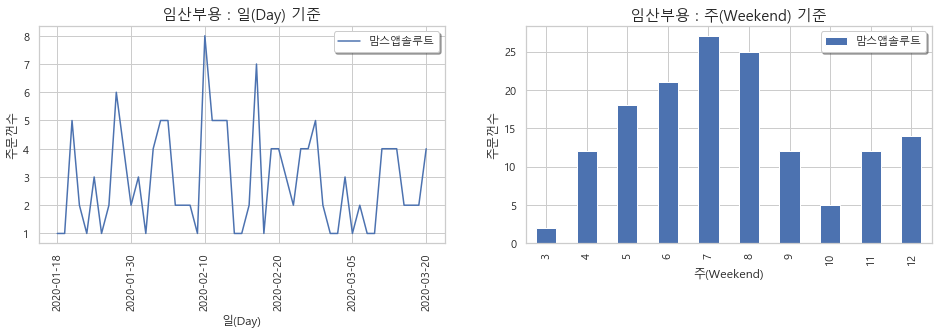

In [0]:
EIS_lv3('임산부용')

+ 맘스마일운 주요 4개 체널(쿠팡/11번가/스마트스토어 및 이마트)에 입점되어 있음)
+ 때문에, 체널 부족으로 인한 판매저조 보다는 전반적인 수요 부족으로 판단됨


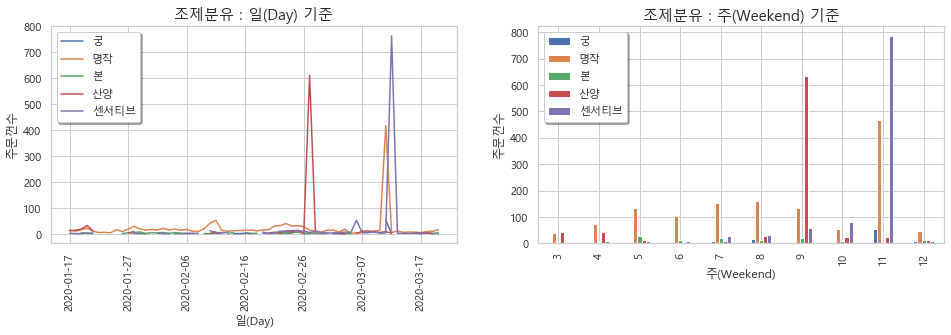

In [0]:
EIS_lv3('조제분유')

In [0]:
+ 분유는 3캔이 기본 구매 수량인 바, 실 주문량은 주문껀수 보다 많음
+ 구매가 증가한 9주차 및 11주차의 경우에는 실 구매 수량에 대한 확인이 별도 필요함

#### 유가공

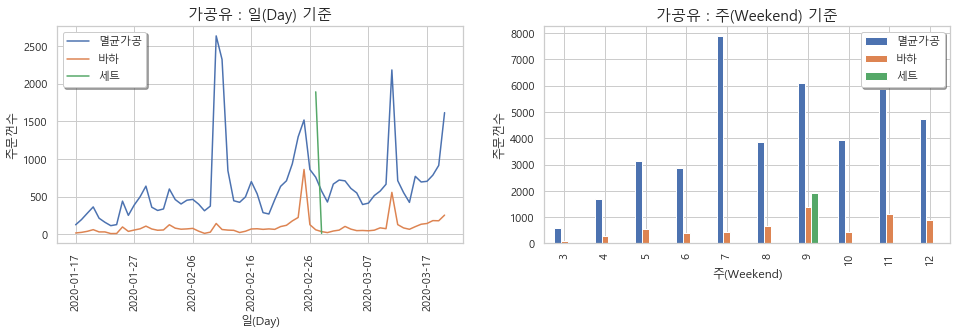

In [0]:
EIS_lv3('가공유')

+ [멸균가공]의 경우, flavor 기준으로 분류한 다음, [바하]와 비교 필요  
  $\to$ Q2-4에 기술함

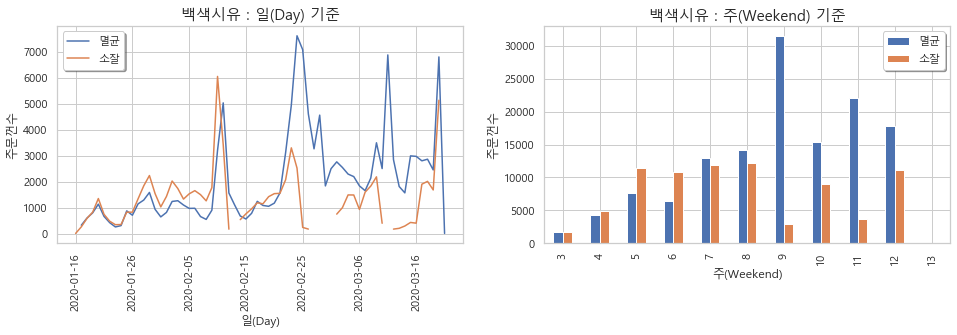

In [0]:
EIS_lv3('백색시유')

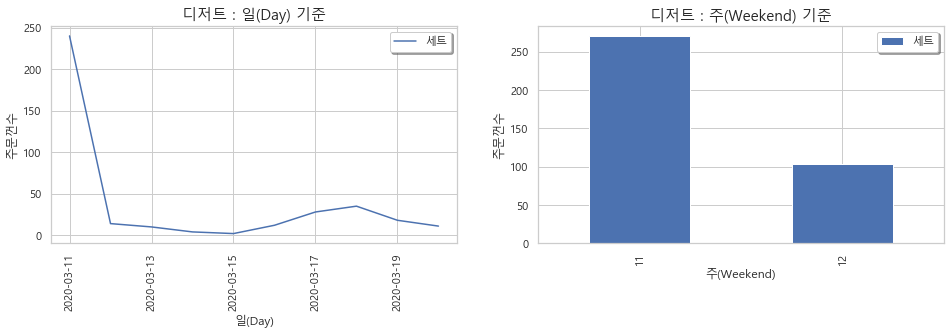

In [0]:
EIS_lv3('디저트')

#### 음료

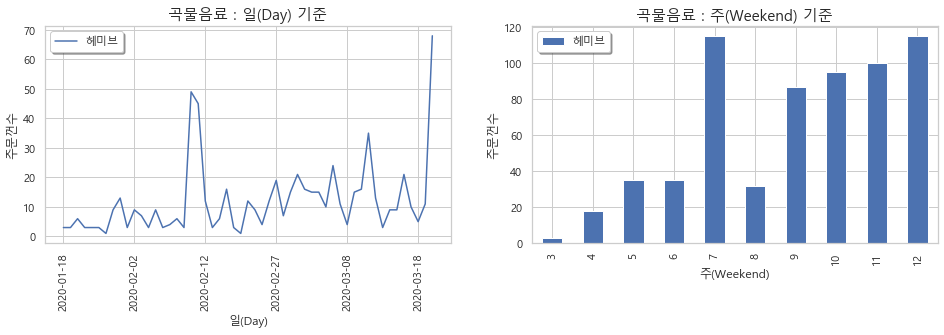

In [0]:
EIS_lv3('곡물음료')

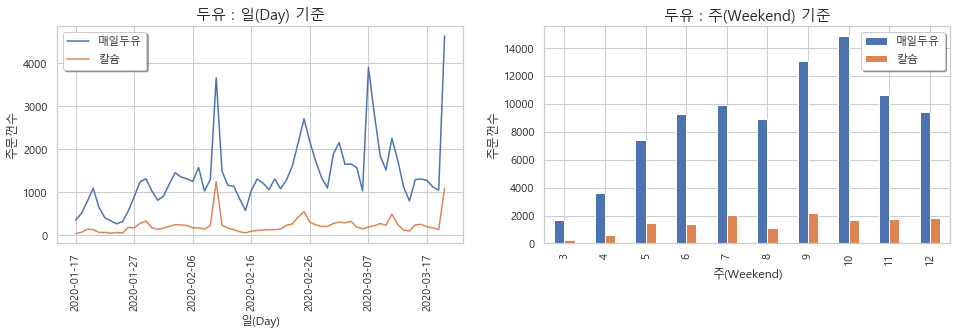

In [0]:
EIS_lv3('두유')

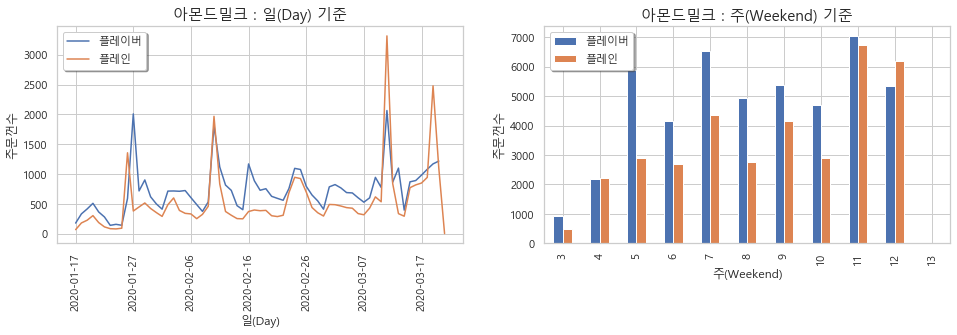

In [0]:
EIS_lv3('아몬드밀크')

+ 12주차의 경우, 플레인이 플레이버를 역전함
+ 단, 일별 그래프에서 시사하는 것 처럼, 이는 프로모션의 영향으로 보여짐

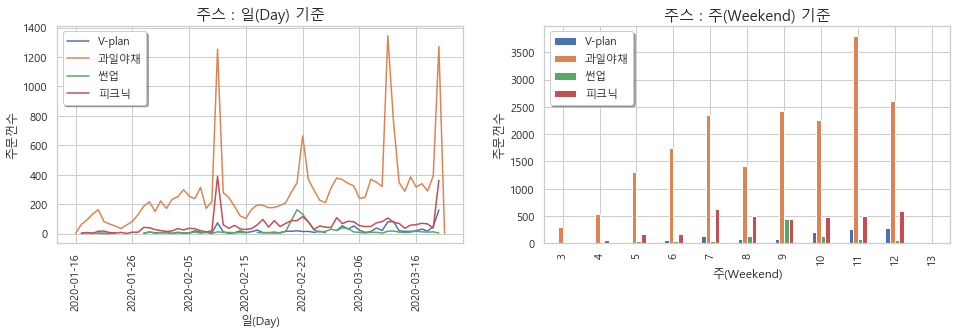

In [0]:
EIS_lv3('주스')

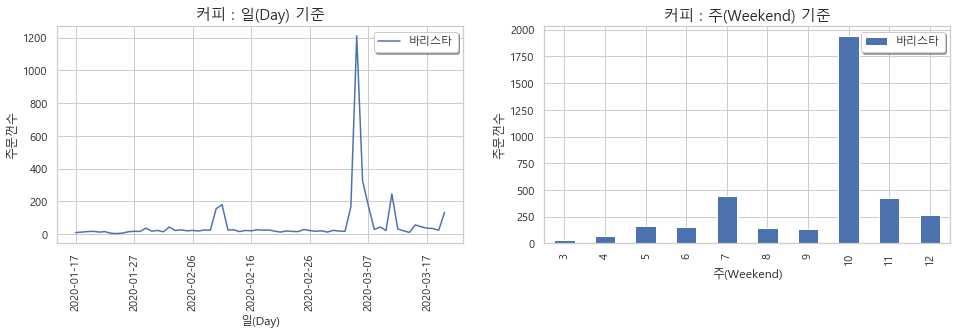

In [0]:
EIS_lv3('커피')

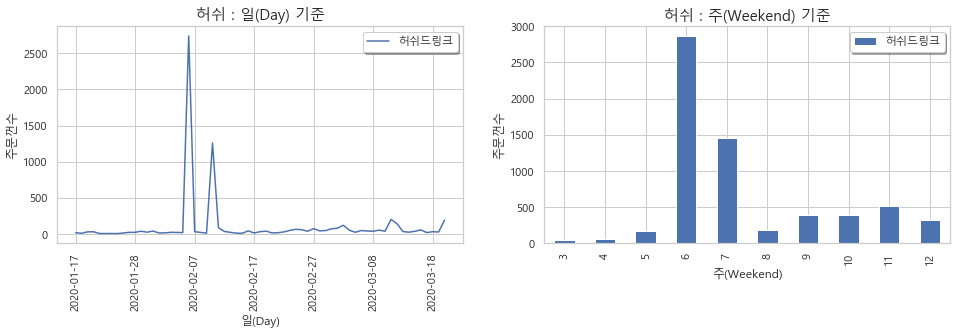

In [0]:
EIS_lv3('허쉬')

#### 가공치즈

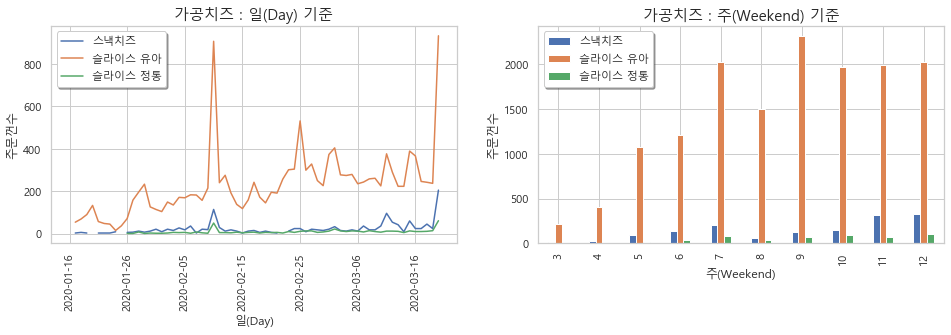

In [0]:
EIS_lv3('가공치즈')

#### 페레로/수입상품

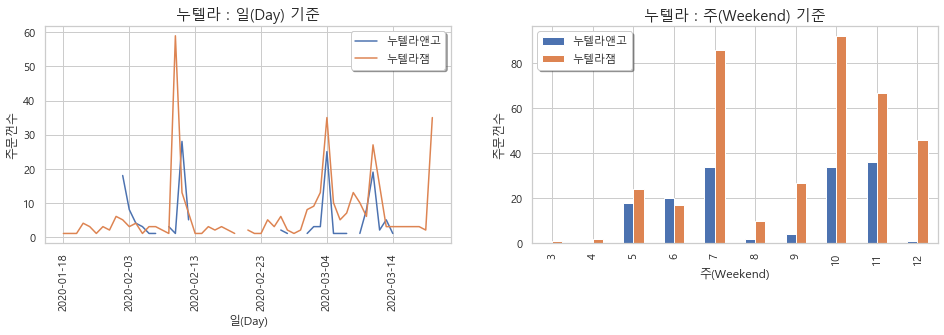

In [0]:
EIS_lv3('누텔라')

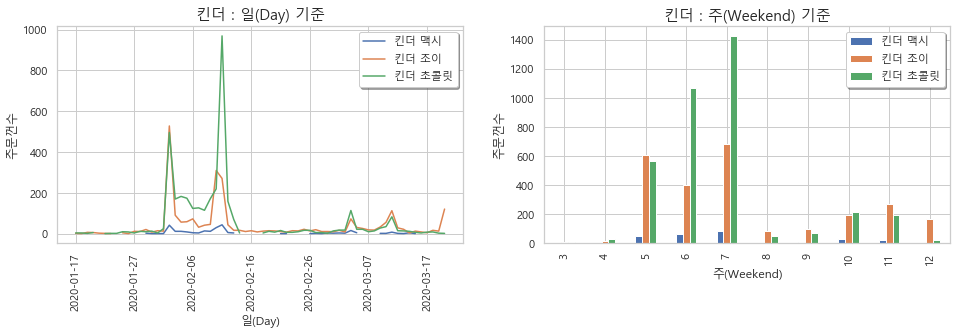

In [0]:
EIS_lv3('킨더')

+ 발렌타인데이(2/14, 7주) 시기에, 주문 증가 이후, 화이트데이(3/14, 11주)에만 추가로 판매됨


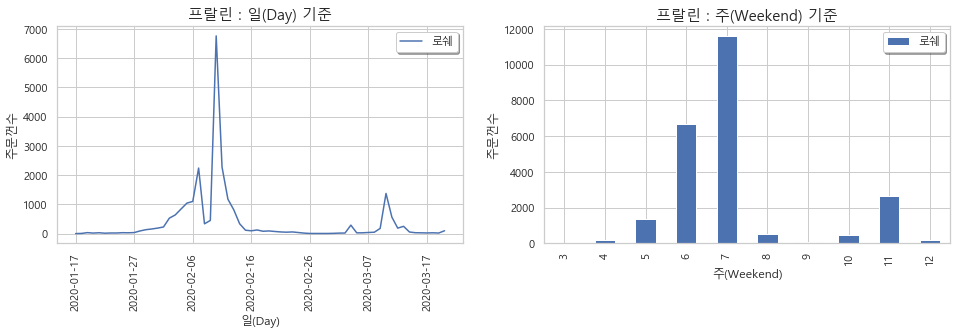

In [0]:
EIS_lv3('프랄린')

In [0]:
+ 킨더와 동일함

#### Q2-1 :HRM에 특이사항은?

**결과** : HRM 제품(스프, 카레, 파스타) 모두, COIVD 추이로 인해 수혜를 받음 

In [24]:
ORDER12 = ORDER[(ORDER.EIS2lv == '스프')]
ORDER13 = ORDER[(ORDER.EIS2lv == '카레')]
ORDER14 = ORDER[(ORDER.EIS3lv == '스낵치즈')]

In [0]:
ORDER12.columns

Index(['거래처명', '주문일자', '주문일시', '주문번호(쇼핑몰)', '상품코드(쇼핑몰)', '상품명', '결제금액', '수량',
       '우편번호', 'PROVINCE', '배송완료', '주문주차', '주문시간', '주문요일', 'EIS1lv', 'EIS2lv',
       'EIS3lv', '맛', '취급체널', '음용연령'],
      dtype='object')

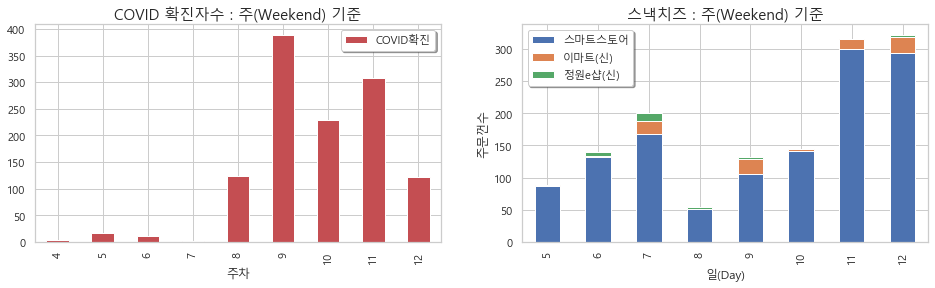

In [25]:
mpl.rc('figure', figsize=(16, 4))

ax = plt.subplot(1,2,1)
pd.crosstab(COVID.주차, 'COVID확진', COVID.지역1, aggfunc="count").plot.bar(ax = ax, color = 'r')
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)
plt.title('COVID 확진자수 : 주(Weekend) 기준',fontsize=15)

ax = plt.subplot(1,2,2)
pd.crosstab(ORDER14.주문주차, ORDER14.거래처명, ORDER14.주문일시, aggfunc="count")[1:].plot.bar(stacked=True,  ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=1)
plt.xticks(rotation=90)
plt.title('스낵치즈 : 주(Weekend) 기준',fontsize=15)
plt.xlabel('일(Day)')
plt.ylabel('주문껀수')

plt.show()

+ 코로나 추이 확인시, 고려사항
  + 1차 : 8주에서 9주 사이의 증가
  + 2차 : 10주에서 11주의 증가
+ HRM 추이 확인시, 고려사항
  + 7주차 기준, 프로모션/체널 영향력 이슈가 있는 스마트스토어 제외 후 결과비교

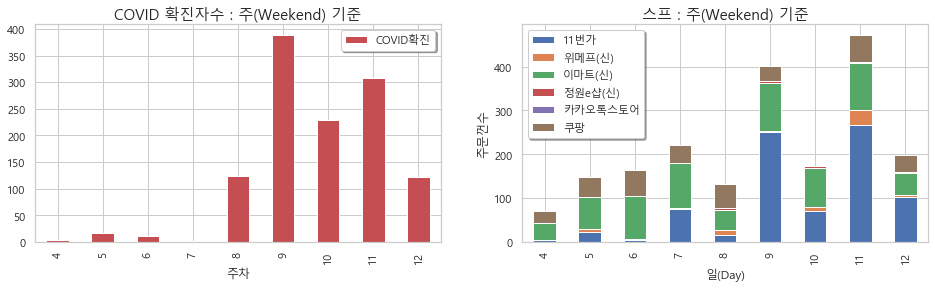

In [0]:
mpl.rc('figure', figsize=(16, 4))

ax = plt.subplot(1,2,1)
pd.crosstab(COVID.주차, 'COVID확진', COVID.지역1, aggfunc="count").plot.bar(ax = ax, color = 'r')
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)
plt.title('COVID 확진자수 : 주(Weekend) 기준',fontsize=15)

ax = plt.subplot(1,2,2)
pd.crosstab(ORDER12[ORDER12['거래처명']!= '스마트스토어'].주문주차, 
            ORDER12[ORDER12['거래처명']!= '스마트스토어'].거래처명,
            ORDER12[ORDER12['거래처명']!= '스마트스토어'].주문일시,
            aggfunc="count")[1:].plot.bar(stacked=True,  ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=1)
plt.xticks(rotation=90)
plt.title('스프 : 주(Weekend) 기준, Naver 제외',fontsize=15)
plt.xlabel('일(Day)')
plt.ylabel('주문껀수')

plt.show()

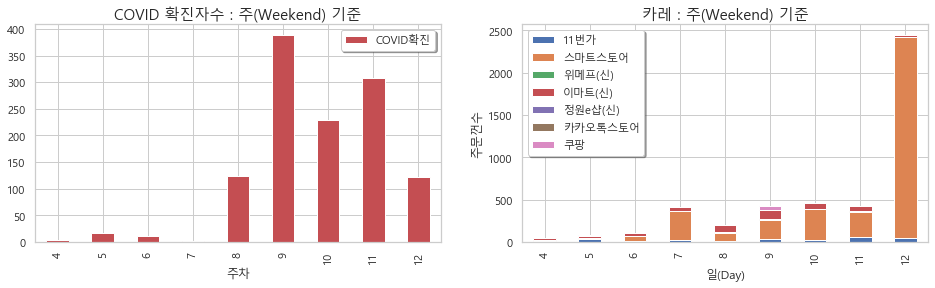

In [0]:
mpl.rc('figure', figsize=(16, 4))

ax = plt.subplot(1,2,1)
pd.crosstab(COVID.주차, 'COVID확진', COVID.지역1, aggfunc="count").plot.bar(ax = ax, color = 'r')
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)
plt.title('COVID 확진자수 : 주(Weekend) 기준',fontsize=15)

ax = plt.subplot(1,2,2)
pd.crosstab(ORDER13.주문주차, ORDER13.거래처명, ORDER13.주문일시, aggfunc="count")[1:].plot.bar(stacked=True,  ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=1)
plt.xticks(rotation=90)
plt.title('카레 : 주(Weekend) 기준',fontsize=15)
plt.xlabel('일(Day)')
plt.ylabel('주문껀수')

plt.show()

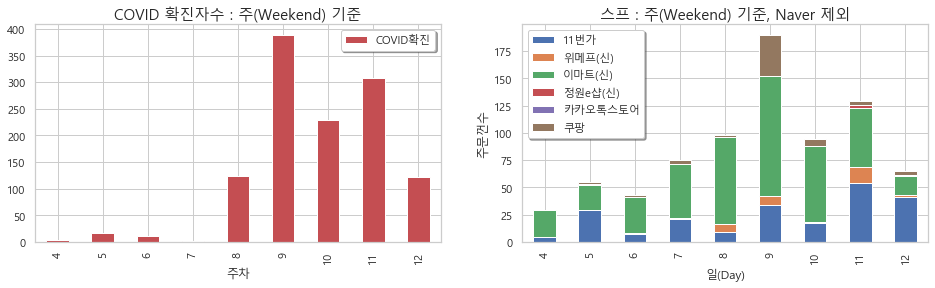

In [0]:
mpl.rc('figure', figsize=(16, 4))

ax = plt.subplot(1,2,1)
pd.crosstab(COVID.주차, 'COVID확진', COVID.지역1, aggfunc="count").plot.bar(ax = ax, color = 'r')
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)
plt.title('COVID 확진자수 : 주(Weekend) 기준',fontsize=15)

ax = plt.subplot(1,2,2)
pd.crosstab(ORDER13[ORDER13['거래처명']!= '스마트스토어'].주문주차, 
            ORDER13[ORDER13['거래처명']!= '스마트스토어'].거래처명,
            ORDER13[ORDER13['거래처명']!= '스마트스토어'].주문일시,
            aggfunc="count")[1:].plot.bar(stacked=True,  ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=1)
plt.xticks(rotation=90)
plt.title('카레 : 주(Weekend) 기준, Naver 제외',fontsize=15)
plt.xlabel('일(Day)')
plt.ylabel('주문껀수')

plt.show()

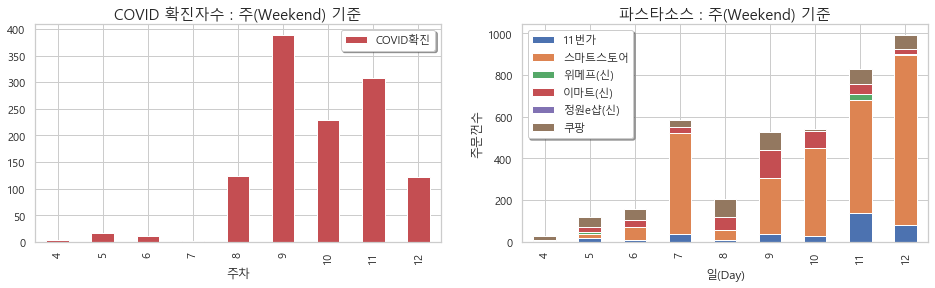

In [0]:
mpl.rc('figure', figsize=(16, 4))

ax = plt.subplot(1,2,1)
pd.crosstab(COVID.주차, 'COVID확진', COVID.지역1, aggfunc="count").plot.bar(ax = ax, color = 'r')
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)
plt.title('COVID 확진자수 : 주(Weekend) 기준',fontsize=15)

ax = plt.subplot(1,2,2)
pd.crosstab(ORDER14.주문주차, ORDER14.거래처명, ORDER14.주문일시, aggfunc="count")[1:].plot.bar(stacked=True,  ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=1)
plt.xticks(rotation=90)
plt.title('파스타소스 : 주(Weekend) 기준',fontsize=15)
plt.xlabel('일(Day)')
plt.ylabel('주문껀수')

plt.show()

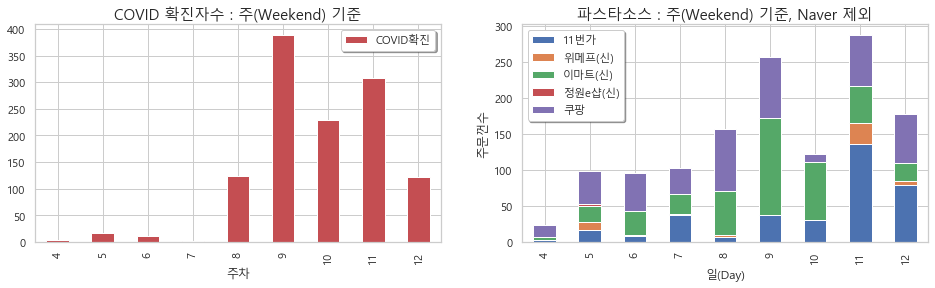

In [0]:
mpl.rc('figure', figsize=(16, 4))

ax = plt.subplot(1,2,1)
pd.crosstab(COVID.주차, 'COVID확진', COVID.지역1, aggfunc="count").plot.bar(ax = ax, color = 'r')
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)
plt.title('COVID 확진자수 : 주(Weekend) 기준',fontsize=15)

ax = plt.subplot(1,2,2)
pd.crosstab(ORDER14[ORDER14['거래처명']!= '스마트스토어'].주문주차, 
            ORDER14[ORDER14['거래처명']!= '스마트스토어'].거래처명,
            ORDER14[ORDER14['거래처명']!= '스마트스토어'].주문일시,
            aggfunc="count")[1:].plot.bar(stacked=True,  ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=1)
plt.xticks(rotation=90)
plt.title('파스타소스 : 주(Weekend) 기준, Naver 제외',fontsize=15)
plt.xlabel('일(Day)')
plt.ylabel('주문껀수')

plt.show()

#### Q2-2 : 셀랙스 추이는?

In [0]:
ORDER11 = ORDER[(ORDER.EIS2lv == '성인영양식')]

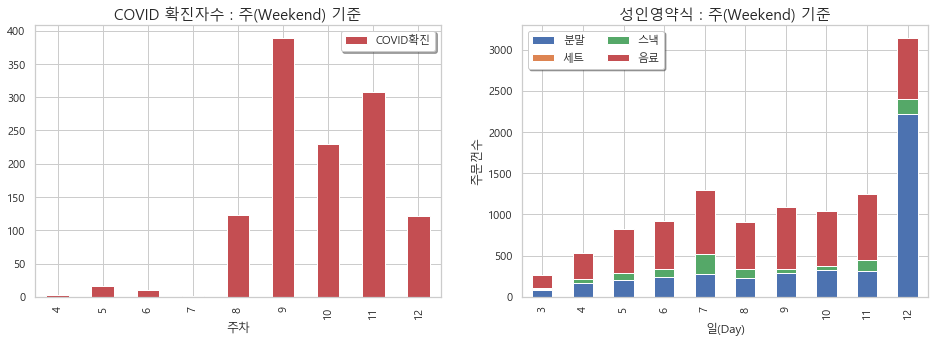

In [0]:
mpl.rc('figure', figsize=(16, 5))

ax = plt.subplot(1,2,1)
pd.crosstab(COVID.주차, 'COVID확진', COVID.지역1, aggfunc="count").plot.bar(ax = ax, color = 'r')
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)
plt.title('COVID 확진자수 : 주(Weekend) 기준',fontsize=15)

ax = plt.subplot(1,2,2)
pd.crosstab(ORDER11.주문주차, ORDER11.EIS3lv, ORDER11.주문일시, aggfunc="count").plot.bar(stacked=True,  ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=2)
plt.xticks(rotation=90)
plt.title('성인영약식 : 주(Weekend) 기준',fontsize=15)
plt.xlabel('일(Day)')
plt.ylabel('주문껀수')

plt.show()

+ 코로나와 성인영양식과는 연관 추이가 없는 상황임
+ 12주차에 분말에 대한 구매가 증가하였는데, 이는 해당 시점에 Naver 프로모션 진행에 따른 효과로 판단됨  
  $\to$ Naver 효과를 제외한 이후, 추가확인이 필요함 

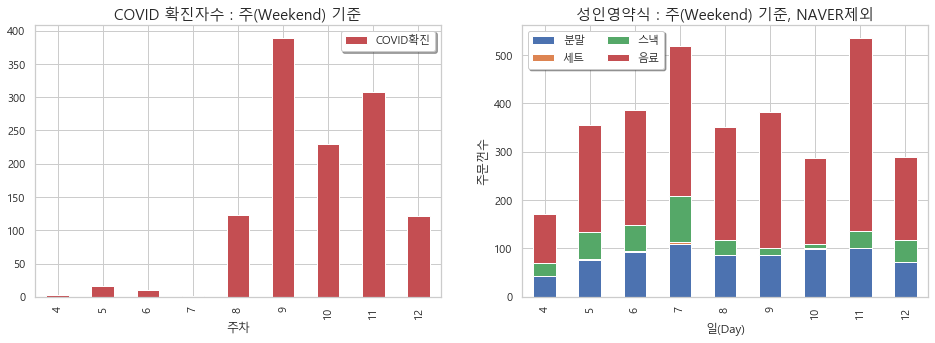

In [0]:
mpl.rc('figure', figsize=(16, 5))

ax = plt.subplot(1,2,1)
pd.crosstab(COVID.주차, 'COVID확진', COVID.지역1, aggfunc="count").plot.bar(ax = ax, color = 'r')
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)
plt.title('COVID 확진자수 : 주(Weekend) 기준',fontsize=15)

ax = plt.subplot(1,2,2)
pd.crosstab(ORDER11[ORDER11['거래처명']!='스마트스토어'].주문주차,
            ORDER11[ORDER11['거래처명']!='스마트스토어'].EIS3lv,
            ORDER11[ORDER11['거래처명']!='스마트스토어'].주문일시, aggfunc="count")[1:].plot.bar(stacked=True,  ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=2)
plt.xticks(rotation=90)
plt.title('성인영약식 : 주(Weekend) 기준, NAVER제외',fontsize=15)
plt.xlabel('일(Day)')
plt.ylabel('주문껀수')

plt.show()

+ Naver 체널 판매 내용을 제외하면, 음료 부분에 대한 판매가 활발함 

In [0]:
# ORDER1.info()

#### Q2-3 : Flavor기준 특이사항은?

In [14]:
ORDER5 = ORDER[(ORDER.EIS2lv == '가공유')]

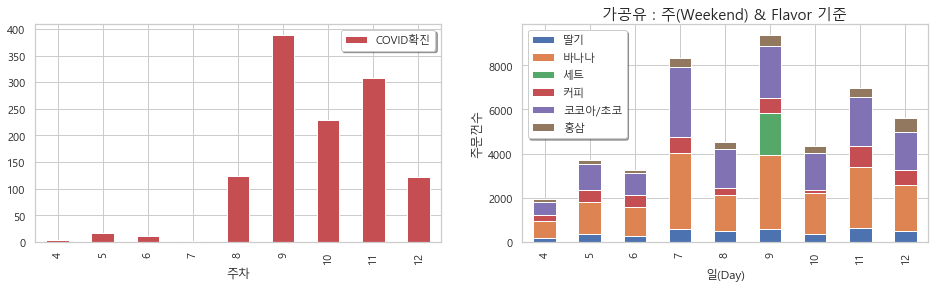

In [13]:
mpl.rc('figure', figsize=(16, 4))

ax = plt.subplot(1,2,1)
pd.crosstab(COVID.주차, 'COVID확진', COVID.지역1, aggfunc="count").plot.bar(ax = ax, color = 'r')
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(1,2,2)
pd.crosstab(ORDER5.주문주차, ORDER5.맛, ORDER5.주문일시, aggfunc="count")[1:].plot.bar(stacked=True, ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True)
plt.xticks(rotation=90)
plt.title('가공유 : 주(Weekend) & Flavor 기준',fontsize=15)
plt.xlabel('일(Day)')
plt.ylabel('주문껀수')

plt.show()

In [0]:
# pd.crosstab(COVID.확진일자, 'COVID확진', COVID.지역1, aggfunc="count")
# pd.crosstab(ORDER5.주문일자, ORDER5.맛, ORDER5.주문일시, aggfunc="count")

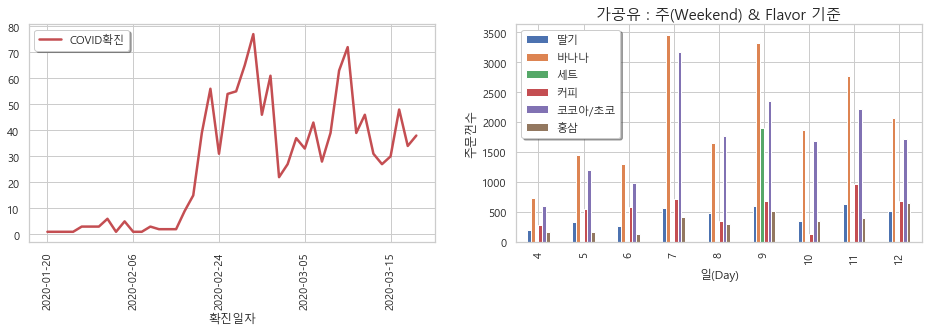

In [25]:
mpl.rc('figure', figsize=(16, 4))

ax = plt.subplot(1,2,1)
pd.crosstab(COVID.확진일자, 'COVID확진', COVID.지역1, aggfunc="count")[:-1].plot.line(ax = ax, color = 'r', linewidth=2.5)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)
plt.xticks(rotation=90)

ax = plt.subplot(1,2,2)
pd.crosstab(ORDER5.주문주차, ORDER5.맛, ORDER5.주문일시, aggfunc="count")[1:].plot.bar(ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=3)
plt.xticks(rotation=90)
plt.title('가공유 : 주(Weekend) & Flavor 기준',fontsize=15)
plt.xlabel('일(Day)')
plt.ylabel('주문껀수')

plt.show()

In [16]:
ORDER4 = ORDER[(ORDER.EIS2lv == '유기농')]

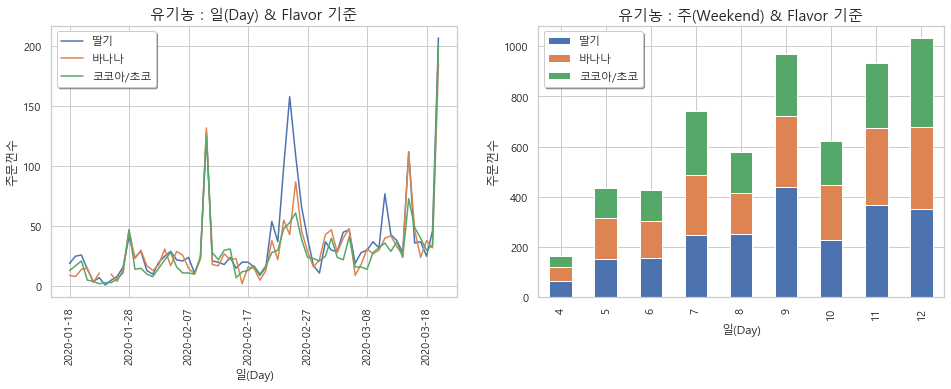

In [41]:
mpl.rc('figure', figsize=(16, 5))

ax = plt.subplot(1,2,1)
pd.crosstab(ORDER4.주문일자, ORDER4.맛, ORDER4.주문일시, aggfunc="count")[1:].plot.line(ax = ax)
# pd.crosstab(ORDER4.주문일자, 'COVID확진', COVID.지역1, aggfunc="count")[:-1].plot.line(ax = ax, color = 'r', linewidth=2.5)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=1)
plt.xticks(rotation=90)
plt.title('유기농 : 일(Day) & Flavor 기준',fontsize=15)
plt.xlabel('일(Day)')
plt.ylabel('주문껀수')

ax = plt.subplot(1,2,2)
pd.crosstab(ORDER4.주문주차, ORDER4.맛, ORDER4.주문일시, aggfunc="count")[1:].plot.bar(stacked=True, ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=1)
plt.xticks(rotation=90)
plt.title('유기농 : 주(Weekend) & Flavor 기준',fontsize=15)
plt.xlabel('일(Day)')
plt.ylabel('주문껀수')

plt.show()

#### Q2-5 : 유아식 제품은?

In [0]:
ORDER.columns

Index(['거래처명', '주문일자', '주문일시', '주문번호(쇼핑몰)', '상품코드(쇼핑몰)', '상품명', '결제금액', '수량',
       '우편번호', 'PROVINCE', '배송완료', '주문주차', '주문시간', '주문요일', 'EIS1lv', 'EIS2lv',
       'EIS3lv', '맛', '취급체널', '음용연령'],
      dtype='object')

In [39]:
ORDER6 = ORDER[(ORDER.음용연령 == '유아')]

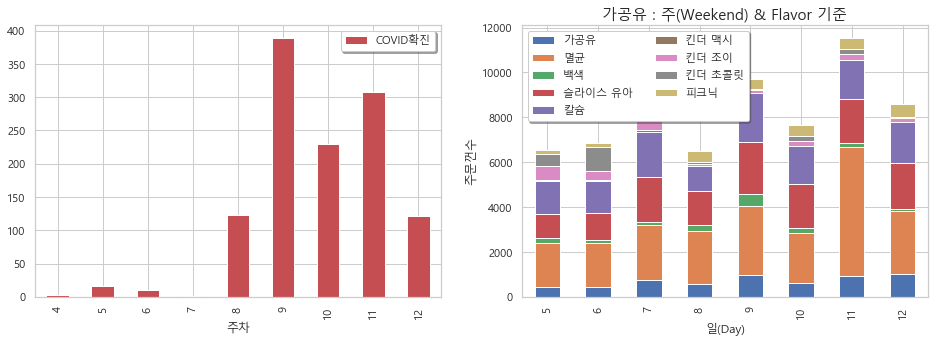

In [40]:
mpl.rc('figure', figsize=(16, 5))

ax = plt.subplot(1,2,1)
pd.crosstab(COVID.주차, 'COVID확진', COVID.지역1, aggfunc="count").plot.bar(ax = ax, color = 'r')
plt.legend(loc='best', fancybox=True, shadow=True, ncol=3)

ax = plt.subplot(1,2,2)
pd.crosstab(ORDER6.주문주차, ORDER6.EIS3lv, ORDER6.주문일시, aggfunc="count")[1:].plot.bar(stacked=True, ax = ax)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=2)
plt.xticks(rotation=90)
plt.title('가공유 : 주(Weekend) & Flavor 기준',fontsize=15)
plt.xlabel('일(Day)')
plt.ylabel('주문껀수')

plt.show()

### Q-3. 일별 자료 비교 : COVID-19 기사껀 수 vs 온라인 주문껀 수

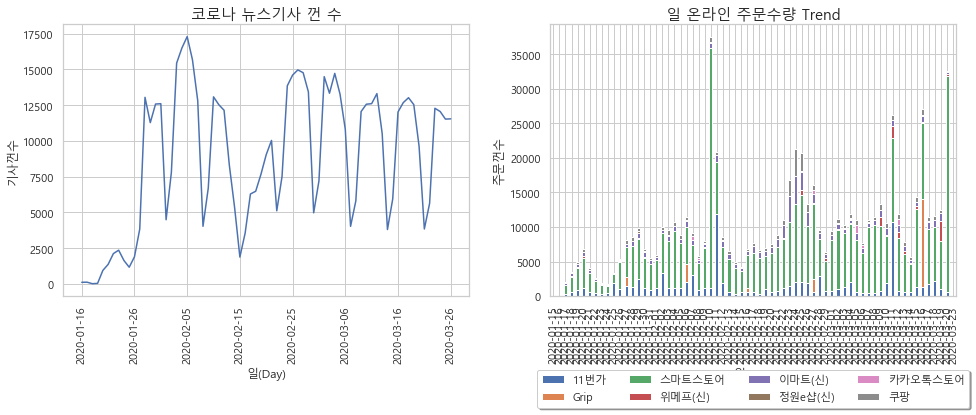

In [0]:
mpl.rc('figure', figsize=(16, 5))

ax = plt.subplot(1,2,1)
news.groupby(by= ['DATE'])['CNT'].sum().plot()
plt.xticks(rotation=90)
plt.title('코로나 뉴스기사 껀 수',fontsize=15)
plt.xlabel('일(Day)')
plt.ylabel('기사껀수')

ax = plt.subplot(1,2,2)
pd.crosstab(ORDER.주문일자, ORDER.거래처명, ORDER.주문일시, aggfunc="count").plot.bar(stacked=True,  ax = ax)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=4)
plt.xticks(rotation=90)
plt.title('일 온라인 주문수량 Trend',fontsize=15)
plt.xlabel('일(Day)')
plt.ylabel('주문껀수')

plt.show()

In [12]:
ORDER.columns

Index(['거래처명', '주문일자', '주문일시', '주문번호(쇼핑몰)', '상품코드(쇼핑몰)', '상품명', '결제금액', '수량',
       '우편번호', 'PROVINCE', '배송완료', '주문주차', '주문시간', '주문요일', 'EIS1lv', 'EIS2lv',
       'EIS3lv', '맛', '취급체널', '음용연령'],
      dtype='object')

In [ ]:
# ORDER9 = ORDER[(ORDER.EIS2lv == '가공유')]

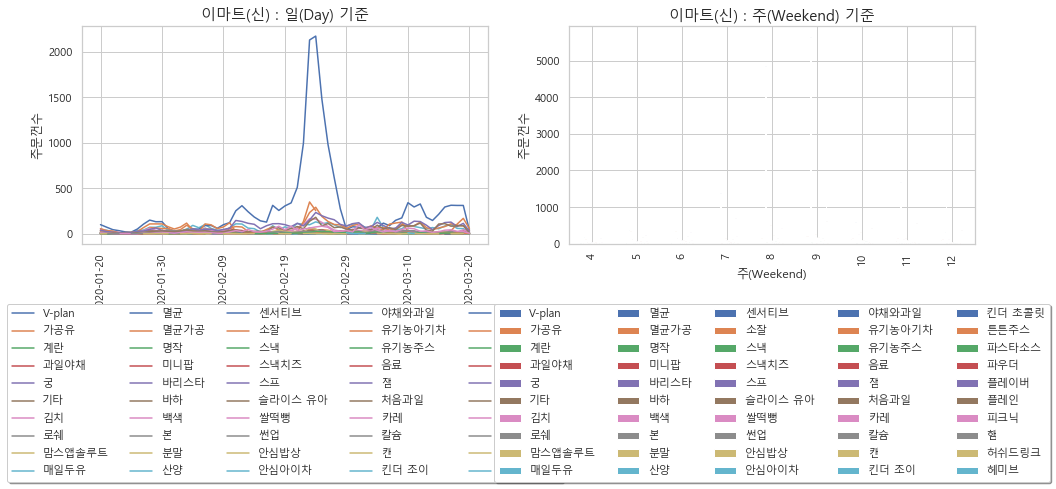

In [14]:
category = '이마트(신)'
mpl.rc('figure', figsize=(16, 4))

ax = plt.subplot(1,2,1)
pd.crosstab(ORDER[(ORDER.거래처명 == category)].주문일자, 
            ORDER[(ORDER.거래처명 == category)].EIS3lv, 
            ORDER[(ORDER.거래처명 == category)].주문일시, 
            aggfunc="count").plot.line(stacked=False,  ax = ax)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=5)
plt.xticks(rotation=90)
plt.title(category + ' : 일(Day) 기준',fontsize=15)
plt.xlabel('일(Day)')
plt.ylabel('주문껀수')

ax = plt.subplot(1,2,2)
pd.crosstab(ORDER[(ORDER.거래처명 == category)].주문주차, 
            ORDER[(ORDER.거래처명 == category)].EIS3lv, 
            ORDER[(ORDER.거래처명 == category)].주문일시, 
            aggfunc="count").plot.bar(stacked=False,  ax = ax)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=5)

plt.xticks(rotation=90)
plt.title(category + ' : 주(Weekend) 기준',fontsize=15)
plt.xlabel('주(Weekend)')
plt.ylabel('주문껀수')

plt.show()

In [20]:
pd.crosstab(ORDER[(ORDER.거래처명 == category)].주문주차, 
            ORDER[(ORDER.거래처명 == category)].EIS3lv, 
            ORDER[(ORDER.거래처명 == category)].주문일시, 
            aggfunc="count").fillna(0).T

주문주차,4,5,6,7,8,9,10,11,12
EIS3lv,,,,,,,,,
V-plan,4.0,2.0,7.0,8.0,27.0,12.0,8.0,15.0,6.0
가공유,45.0,123.0,154.0,96.0,154.0,209.0,136.0,85.0,91.0
계란,13.0,13.0,4.0,0.0,1.0,4.0,3.0,0.0,1.0
과일야채,90.0,194.0,228.0,197.0,121.0,202.0,155.0,149.0,118.0
궁,0.0,2.0,0.0,1.0,3.0,3.0,1.0,0.0,1.0
기타,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
김치,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0
로쉐,18.0,53.0,204.0,66.0,4.0,0.0,0.0,4.0,3.0
맘스앱솔루트,0.0,3.0,2.0,1.0,3.0,0.0,3.0,1.0,1.0


### Q4 : 코로나 여파의 주요 외부 변수는?

In [0]:
ORDER_Q4 = (ORDER.groupby(['주문일자', '주문번호(쇼핑몰)'])['결제금액'].count().reset_index()).groupby('주문일자')['결제금액'].sum().reset_index()
ORDER_Q4.rename(columns = {'주문일자' : 'DATE', '결제금액': 'CNT'}, inplace=True)
ORDER_Q4['gubun'] = 'SALES'

In [0]:
COVID_Q4 = (COVID.groupby('확진일자')['지역1'].count().reset_index())
COVID_Q4.rename(columns = {'확진일자' : 'DATE', '지역1': 'CNT'}, inplace=True)
COVID_Q4['gubun'] = 'COVID'
COVID_Q4['CNT'] =  (100. * COVID_Q4.CNT / COVID_Q4.CNT.sum()).round(2)

In [0]:
ORDER_Q4['CNT'] =  (100. * ORDER_Q4.CNT / ORDER_Q4.CNT.sum()).round(2)

In [0]:
news_Q4 = news.groupby('DATE')['CNT'].sum().reset_index()
news_Q4['gubun'] = 'news'

In [0]:
ORDER_Q41 = pd.concat([ORDER_Q4, news_Q4], axis =0)
ORDER_Q42 = pd.concat([ORDER_Q4, COVID_Q4], axis =0)

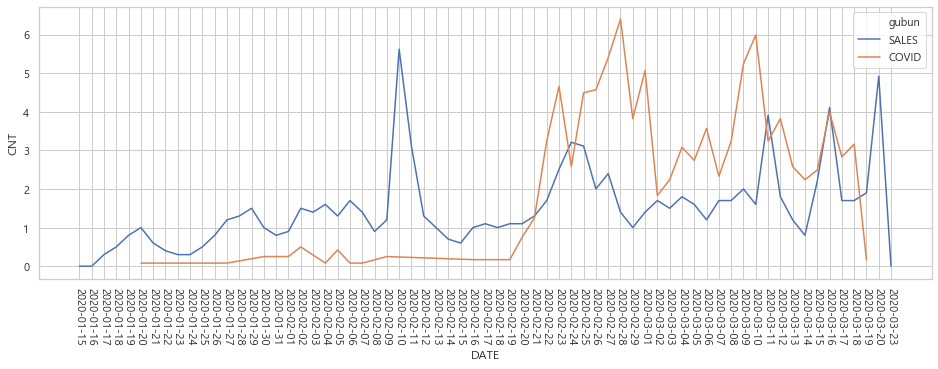

In [0]:
mpl.rc('figure', figsize=(16, 5))

sns.lineplot(x="DATE", y='CNT',hue="gubun", data=ORDER_Q42).set_xticklabels(ORDER_Q4.DATE, rotation=270)

plt.show()

+ 코로나가 본격적으로 이슈화된 시점은 2/21(금)이며, 관련기사는 2/24(월)부터 증가됨.
+ 주말임에도 불구하고, 2/22(토) 및 2/23(일)에 주문이 증가함.

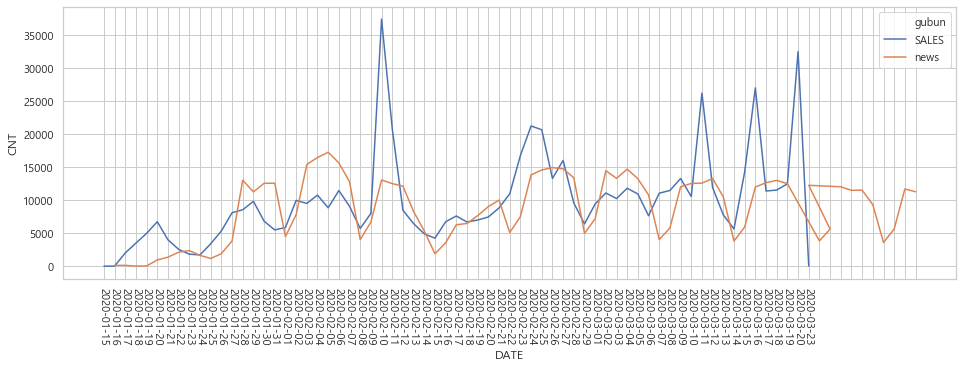

In [0]:
mpl.rc('figure', figsize=(16, 5))

sns.lineplot(x="DATE", y='CNT',hue="gubun", data=ORDER_Q41).set_xticklabels(ORDER_Q4.DATE, rotation=270)

plt.show()

**<확인사항>**
+ 온라인 뉴스기사는 토/일에 일시적으로 감소하며, 온라인 구매역시 토/일에 감소한다.  
  (통상, 마트가 주말에 활발한것과 대비됨)
+ '주말 감소'는 '온라인'의 공통된 특성으로 판단되나, 그 외의 동행성(혹은 연관성)은 없는 상황임.

### Q5. 같이 구매하는 제품 그룹은?

In [0]:
# ORDER.columns

Index(['거래처명', '주문일자', '주문일시', '주문번호(쇼핑몰)', '상품코드(쇼핑몰)', '상품명', '결제금액', '수량',
       '우편번호', 'PROVINCE', '배송완료', '주문주차', '주문시간', '주문요일', 'EIS1lv', 'EIS2lv',
       'EIS3lv', '맛', '취급체널'],
      dtype='object')

In [0]:
cust_prod = pd.crosstab(ORDER['주문번호(쇼핑몰)'], ORDER['EIS2lv'] )
# ORDER_CROSS = pd.crosstab(ORDER.주문번호, ORDER.카테고리, 1, aggfunc="count").reset_index()
# ORDER_CROSS['total'] = ORDER_CROSS

In [0]:
# cust_prod[100:110]

In [0]:
import itertools 

def support(df, item_lst):
    return (df[list(item_lst)].sum(axis=1)==len(item_lst)).mean()

def make_all_set_over_support(df, support_threshold):
    items = []
    single_items = [col for col in df.columns if support(df, [col]) > support_threshold] # size 1 items
    
    size = 2
    while True:
        new_items = []
        for item_cand in itertools.combinations(single_items, size):
            #print(item_cand, (df[list(item_cand)].sum(axis=1)==size).mean())
            if support(df, list(item_cand)) > support_threshold:
                new_items.append(list(item_cand))
        if len(new_items)==0:
            break
        else:
            items+=new_items
            size+=1
    items += [ [s] for s in single_items]# 이렇게 해줘야 모든 type이 list가 됨
    return items

def make_confidence_lst(df, item_set_over_support, confidence_threshold):
    r_lst = []
    for item1 in item_set_over_support:
        for item2 in item_set_over_support:
            if len(set(item1).intersection(set(item2)))==0:
                conf = support(df, list(set(item1).union(set(item2))))/ support(df, item1)
                if conf > confidence_threshold:
                    r_lst.append((item1, item2, conf))
            else:
                continue
    return sorted(r_lst, key=lambda x: x[2], reverse=True)

def make_lift_lst(df, item_set_over_support, lift_threhsold):
    r_lst = []
    for item1 in item_set_over_support:
        for item2 in item_set_over_support:
            if len(set(item1).intersection(set(item2)))==0:
                lift = support(df, list(set(item1).union(set(item2))))
                lift /= support(df, item1)
                lift /= support(df, item2)
                if lift > lift_threhsold:
                    r_lst.append((item1, item2, lift))
            else:
                continue
    return sorted(r_lst, key=lambda x: x[2], reverse=True)

In [0]:
%%time 

over_support_lst = make_all_set_over_support(cust_prod, 0.022) ## 값이 클수록 연관도 떨어짐
print("over support list")
print(over_support_lst)
print("-----------------")
print("over confidence list")
for a, b, conf in  make_confidence_lst(cust_prod, over_support_lst, 1):
    print("{} => {}: {}".format(a, b, conf))
print("-----------------")
print("over lift list")
for a, b, lift in  make_lift_lst(cust_prod, over_support_lst, 100):
    print("{} => {}: {}".format(a, b, lift))
print("-----------------")

over support list
[['가공유'], ['두유'], ['백색시유'], ['성인영양식'], ['아몬드밀크'], ['유기농'], ['유아식'], ['주스'], ['프랄린']]
-----------------
over confidence list
-----------------
over lift list
-----------------
Wall time: 2.78 s


In [0]:
# make_all_set_over_support(cust_prod, 0.0217).count()

In [0]:
# length(make_all_set_over_support(cust_prod, 0.0217))

In [43]:
ORDER.columns

Index(['거래처명', '주문일자', '주문일시', '주문번호(쇼핑몰)', '상품코드(쇼핑몰)', '상품명', '결제금액', '수량',
       '우편번호', 'PROVINCE', '배송완료', '주문주차', '주문시간', '주문요일', 'EIS1lv', 'EIS2lv',
       'EIS3lv', '맛', '취급체널', '음용연령'],
      dtype='object')

In [59]:
def Channel_GUBUN(channel):
    mpl.rc('figure', figsize=(16, 5))

    ax = plt.subplot(1,2,1)
    pd.crosstab(ORDER[(ORDER.거래처명 == channel)].주문일자, 
                ORDER[(ORDER.거래처명 == channel)].거래처명, 
                ORDER[(ORDER.거래처명 == channel)].주문일시, 
                aggfunc="count")[:-1].plot.line(stacked=False,  ax = ax)
    plt.legend(loc='best', fancybox=True, shadow=True)
    plt.xticks(rotation=90)
    plt.title(channel + ' : 일(Day) 기준',fontsize=15)
    plt.xlabel('일(Day)')
    plt.ylabel('주문껀수')

    ax = plt.subplot(1,2,2)
    pd.crosstab(ORDER[(ORDER.거래처명 == channel)].주문주차, 
                ORDER[(ORDER.거래처명 == channel)].거래처명, 
                ORDER[(ORDER.거래처명 == channel)].주문일시, 
                aggfunc="count")[:-1].plot.bar(stacked=False,  ax = ax)
    plt.legend(loc='best', fancybox=True, shadow=True)
    plt.xticks(rotation=90)
    plt.title(channel + ' : 주(Weekend) 기준',fontsize=15)
    plt.xlabel('주(Weekend)')
    plt.ylabel('주문껀수')

    plt.show()

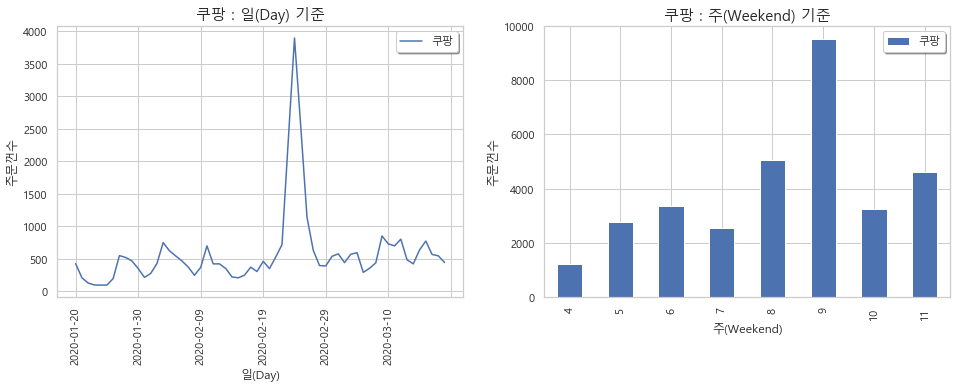

In [60]:
Channel_GUBUN('쿠팡')

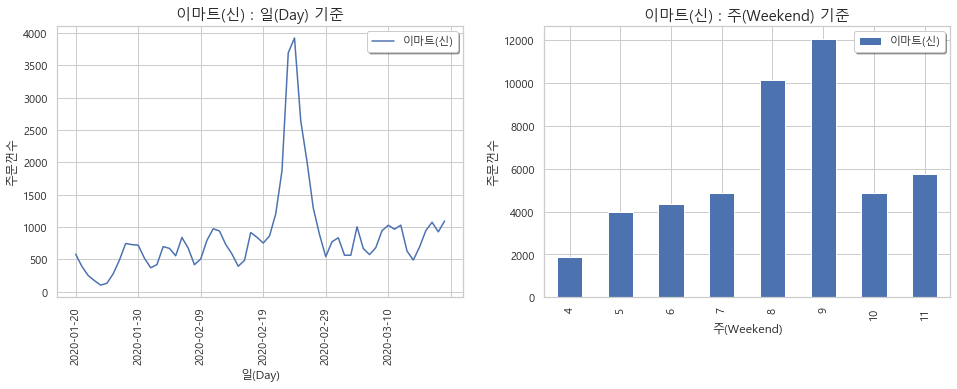

In [61]:
Channel_GUBUN('이마트(신)')